In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import SymLogNorm
plt.rcParams['figure.max_open_warning'] = 500
import qcodes as qc
import qcodes.instrument_drivers.nplab_drivers as npd
import os
from os import path
import lmfit
from lmfit.models import LinearModel
from scipy.interpolate import RectBivariateSpline
from scipy.ndimage import gaussian_filter

In [2]:
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['figure.dpi'] = 300
%config InlineBackend.figure_format = 'svg'  # with this, we need to raster the pcolormesh images with rasterized=True
# and save with .svg in the filename. don't worry. The annoying white line/offset in the image doesn't seem to show up if you use dpi=something while saving

In [3]:
# plt.rcParams['font.sans-serif'] = ['Arial',  # make Arial the standard font
#  'DejaVu Sans',
#  'Bitstream Vera Sans',
#  'Computer Modern Sans Serif',
#  'Lucida Grande',
#  'Verdana',
#  'Geneva',
#  'Lucid',
#  'Helvetica',
#  'Avant Garde',
#  'sans-serif']

# plt.rcParams['font.size'] = 12

font = {
                'family': 'Arial',
                'size': 12,
                'serif': 'Times',
                'sans-serif': 'Arial'
            }

plt.rc('font', **font)

In [4]:
cd ..

/Users/robertpolski/Documents/NPGroupResearch/Measurements/Triton/qcodes_data


In [5]:
qc.DataSet.default_io.base_location = path.abspath('.')
figfile = path.abspath('.') + '/Figures/TBGWSe2_HighFieldChernPaper/'

In [6]:
#%matplotlib widget

In [7]:
dfan1 = qc.load_data('data/2020-02-11/#002_W5_865_48-24_830_21-24_baseT_1nA_B-Vgsweep_09-37-41')

In [8]:
Rxxfan1 = dfan1.lockin865_X[:, 25:]/1e-9
gfan1 = dfan1.srframe_volt_p1_set[0, 25:]
bfan1 = dfan1.triton_field_set_stable_set[:]

In [9]:
bfan1[20]

1.0

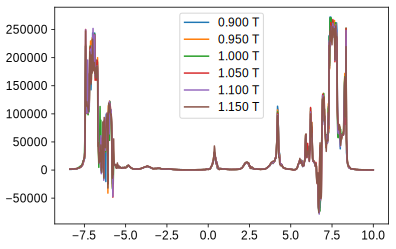

In [10]:
plt.figure()
for i in range(6):
    indx = 18 + i
    plt.plot(gfan1, Rxxfan1[indx, :], label='{:.3f} T'.format(bfan1[indx]))

plt.legend()

In [11]:
indices = [i not in (21, 22) for i in range(len(bfan1))]

In [12]:
Rfan1func = RectBivariateSpline(gfan1, bfan1[indices], Rxxfan1[indices, :].T, kx=1, ky=1)

In [13]:
gfanint = np.linspace(-8.375, 10, 1500)
yfanint = np.linspace(0, 8, 600)
Rxxfan1int = gaussian_filter(Rfan1func(gfanint, yfanint).T, (1.2, 1.2))

fig, ax = plt.subplots(2, 1, figsize=(11, 8))
norm = colors.SymLogNorm(2000, vmin=-500, vmax=1e4)
p1 = ax[0].pcolormesh(gfanint, yfanint, Rxxfan1int, cmap='inferno', norm=norm, rasterized=True)

Bl = 8
Bs = 0
V0 = 0.42
sl = 15.1
b = -V0*sl
LW = 0.4

# CNP
for i in [-8, -7, -5, -6, -4, -3, -2, -1, 1, 2, 3, 4, 5, 6, 7, 8]:
    x = np.linspace((Bs*i - b)/sl, (Bl*i - b)/sl, 10)
    ax[0].plot(x, (x*sl + b)/i, color='white', lw=LW)
    
#+half filling
Vhp = 4.24
b = -Vhp*sl
for i in [2, 3, 4, 6, 8, 10]:
    x = np.linspace((Bs*i - b)/sl, (Bl*i - b)/sl, 10)
    ax[0].plot(x, (x*sl + b)/i, color='white', lw=LW)
    
#+quarter filling
Vgatefull = (Vhp - V0)*2
Vqp = V0 + Vgatefull/4 +0.07
b = -Vqp*sl
for i in [3, 4, 5, 6, 7]:
    x = np.linspace((Bs*i - b)/sl, (Bl*i - b)/sl, 10)
    ax[0].plot(x, (x*sl + b)/i, color='white', lw=LW)
    
Vqp = V0 + Vgatefull/4 - 0.02
b = -Vqp*sl
for i in [2, 3, 10, 13, 16]:
    x = np.linspace((Bs*i - b)/sl, (Bl*i - b)/sl, 10)
    ax[0].plot(x, (x*sl + b)/i, color='white', lw=LW)
    
#+full filling
Vgatefull = (Vhp - V0)*2
Vfp = V0 + Vgatefull
b = -Vfp*sl
for i in [2, 3, 4, 5, 6, 8, 10]:
    x = np.linspace((Bs*i - b)/sl, (Bl*i - b)/sl, 10)
    ax[0].plot(x, (x*sl + b)/i, color='white', lw=LW)

p2 = ax[1].pcolormesh(gfanint, yfanint, Rxxfan1int, cmap='inferno', norm=norm, rasterized=True)

# ax[0].axis((2, 10, 0.0, 8.0))
# ax[1].axis((2, 6, 0.0, 8.0))

In [14]:
a = 0.246e-9
C = sl*1.602e-19**2/6.626e-34
dBN = 3*8.85e-12/C
print(dBN)
nfull = (Vgatefull)*C/1.602e-19
theta = np.sqrt(np.sqrt(3)*(nfull)*a**2/8)*180/np.pi
print('angle: {:.4f} degrees'.format(theta))

4.539562357827328e-08
angle: 1.0953 degrees


In [15]:
data17 = qc.load_data('data/2020-03-06/#006_W3_865_24-48_couplefields_baseT_1nA_11-47-43')#here the field is 5,6,7,8T
data18 = qc.load_data('data/2020-03-06/#008_W3_865_24-48_couplefields_300mK_1nA_15-23-04')
data19 = qc.load_data('data/2020-03-06/#009_W3_865_24-48_couplefields_500mK_1nA_17-54-38')
data20 = qc.load_data('data/2020-03-06/#010_W3_865_24-48_couplefields_750mK_1nA_20-35-38')
data21 = qc.load_data('data/2020-03-08/#002_W3_865_24-48_couplefields_1K_1nA_15-58-20')
data22 = qc.load_data('data/2020-03-09/#001_W3_865_24-48_couplefields_1.25K_1nA_10-39-43')
data23 = qc.load_data('data/2020-03-09/#002_W3_865_24-48_couplefields_1.5K_1nA_13-23-11')
data24 = qc.load_data('data/2020-03-09/#003_W3_865_24-48_couplefields_1.75K_1nA_15-53-21')
data25 = qc.load_data('data/2020-03-09/#004_W3_865_24-48_couplefields_2K_1nA_18-23-38')
data26 = qc.load_data('data/2020-03-09/#005_W3_865_24-48_couplefields_3K_1nA_21-45-28')
data27 = qc.load_data('data/2020-03-10/#001_W3_865_24-48_couplefields_5K_1nA_00-15-37')
data28 = qc.load_data('data/2020-03-10/#002_W3_865_24-48_couplefields_7K_1nA_02-45-44')
data29 = qc.load_data('data/2020-03-10/#003_W3_865_24-48_couplefields_10K_1nA_05-15-54')
data30 = qc.load_data('data/2020-03-10/#004_W3_865_24-48_couplefields_15K_1nA_07-46-01')
data31 = qc.load_data('data/2020-03-10/#005_W3_865_24-48_couplefields_20K_1nA_10-16-12')

In [16]:
data32 = qc.load_data('data/2020-03-11/#001_W3_865_24-48_couplefields_2.5K_1nA_11-40-31')# here the field is 5,5.5,6,7,8T
data33 = qc.load_data('data/2020-03-11/#002_W3_865_24-48_couplefields_3.5K_1nA_14-27-56')
data34 = qc.load_data('data/2020-03-11/#004_W3_865_24-48_couplefields_4K_1nA_19-10-20')
data35 = qc.load_data('data/2020-03-11/#005_W3_865_24-48_couplefields_4.5K_1nA_21-55-10')
data36 = qc.load_data('data/2020-03-12/#001_W3_865_24-48_couplefields_4.5K_1nA_00-53-01')
data37 = qc.load_data('data/2020-03-12/#002_W3_865_24-48_couplefields_6K_1nA_03-50-47')
data38 = qc.load_data('data/2020-03-12/#003_W3_865_24-48_couplefields_8K_1nA_06-48-43')
data39 = qc.load_data('data/2020-03-12/#004_W3_865_24-48_couplefields_9K_1nA_09-46-31')

In [39]:
data40 = qc.load_data('data/2020-03-12/#005_W3_865_24-48_2-4T_baseT_1nA_19-12-02')# here the field is 2,3,3.5,4T
data41 = qc.load_data('data/2020-03-12/#006_W3_865_24-48_2-4T_250mK_1nA_21-46-10')
data42 = qc.load_data('data/2020-03-13/#001_W3_865_24-48_2-4T_500mK_1nA_00-05-43')
data43 = qc.load_data('data/2020-03-13/#002_W3_865_24-48_2-4T_750mK_1nA_02-25-24')
data44 = qc.load_data('data/2020-03-13/#003_W3_865_24-48_2-4T_1K_1nA_04-44-58')
data45 = qc.load_data('data/2020-03-13/#004_W3_865_24-48_2-4T_1.25K_1nA_07-04-32')
data46 = qc.load_data('data/2020-03-13/#005_W3_865_24-48_2-4T_1.5K_1nA_09-25-36')
data47 = qc.load_data('data/2020-03-13/#006_W3_865_24-48_2-4T_1.75K_1nA_11-45-09')
data48 = qc.load_data('data/2020-03-13/#007_W3_865_24-48_2-4T_2K_1nA_14-04-45')
data49 = qc.load_data('data/2020-03-13/#008_W3_865_24-48_2-4T_2.5K_1nA_16-48-06')
data50 = qc.load_data('data/2020-03-13/#010_W3_865_24-48_2-4T_3K_1nA_19-49-05')
data51 = qc.load_data('data/2020-03-13/#011_W3_865_24-48_2-4T_3.5K_1nA_21-54-38')
data52 = qc.load_data('data/2020-03-14/#001_W3_865_24-48_2-4T_4K_1nA_00-14-14')
data53 = qc.load_data('data/2020-03-14/#002_W3_865_24-48_2-4T_4.5K_1nA_02-33-48')
data54 = qc.load_data('data/2020-03-14/#003_W3_865_24-48_2-4T_5K_1nA_04-53-22')
data55 = qc.load_data('data/2020-03-14/#004_W3_865_24-48_2-4T_5.5K_1nA_07-12-56')
data56 = qc.load_data('data/2020-03-14/#005_W3_865_24-48_2-4T_6K_1nA_09-32-28')
data57 = qc.load_data('data/2020-03-14/#006_W3_865_24-48_2-4T_7K_1nA_11-52-13')
data58 = qc.load_data('data/2020-03-14/#007_W3_865_24-48_2-4T_8K_1nA_14-11-47')
data59 = qc.load_data('data/2020-03-14/#008_W3_865_24-48_2-4T_9K_1nA_16-31-19')
data60 = qc.load_data('data/2020-03-14/#009_W3_865_24-48_2-4T_10K_1nA_18-51-08')
data61 = qc.load_data('data/2020-03-14/#010_W3_865_24-48_2-4T_12K_1nA_21-10-41')
data62 = qc.load_data('data/2020-03-14/#011_W3_865_24-48_2-4T_13K_1nA_23-30-21')
data63 = qc.load_data('data/2020-03-15/#001_W3_865_24-48_2-4T_15K_1nA_01-50-14')
data64 = qc.load_data('data/2020-03-15/#002_W3_865_24-48_2-4T_17K_1nA_04-09-47')
data65 = qc.load_data('data/2020-03-15/#003_W3_865_24-48_2-4T_20K_1nA_06-29-31')

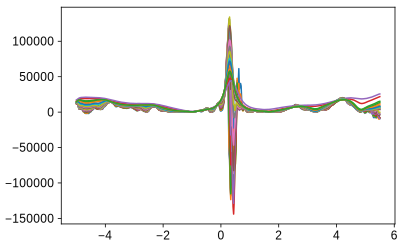

In [19]:
plt.figure()#5T
i = 0
plt.plot(data17.srframe_volt_p1_set[0, :], gaussian_filter(data17.lockin865_X[i, :], 0.7)/1e-9)
plt.plot(data18.srframe_volt_p1_set[0, :], gaussian_filter(data18.lockin865_X[i, :], 0.7)/1e-9)
plt.plot(data19.srframe_volt_p1_set[0, :], gaussian_filter(data19.lockin865_X[i, :], 0.7)/1e-9)
plt.plot(data20.srframe_volt_p1_set[0, :], gaussian_filter(data20.lockin865_X[i, :], 0.7)/1e-9)
plt.plot(data21.srframe_volt_p1_set[0, :], gaussian_filter(data21.lockin865_X[i, :], 0.7)/1e-9)
plt.plot(data22.srframe_volt_p1_set[0, :], gaussian_filter(data22.lockin865_X[i, :], 0.7)/1e-9)
plt.plot(data23.srframe_volt_p1_set[0, :], gaussian_filter(data23.lockin865_X[i, :], 0.7)/1e-9)
plt.plot(data24.srframe_volt_p1_set[0, :], gaussian_filter(data24.lockin865_X[i, :], 0.7)/1e-9)
plt.plot(data25.srframe_volt_p1_set[0, :], gaussian_filter(data25.lockin865_X[i, :], 0.7)/1e-9)
plt.plot(data26.srframe_volt_p1_set[0, :], gaussian_filter(data26.lockin865_X[i, :], 0.7)/1e-9)
plt.plot(data27.srframe_volt_p1_set[0, :], gaussian_filter(data27.lockin865_X[i, :], 0.7)/1e-9)
plt.plot(data28.srframe_volt_p1_set[0, :], gaussian_filter(data28.lockin865_X[i, :], 1.5)/1e-9)
plt.plot(data29.srframe_volt_p1_set[0, :], gaussian_filter(data29.lockin865_X[i, :], 1.5)/1e-9)
plt.plot(data30.srframe_volt_p1_set[0, :], gaussian_filter(data30.lockin865_X[i, :], 1.5)/1e-9)
plt.plot(data31.srframe_volt_p1_set[0, :], gaussian_filter(data31.lockin865_X[i, :], 1.5)/1e-9)
plt.plot(data32.srframe_volt_p1_set[0, :], gaussian_filter(data32.lockin865_X[i, :], 1.5)/1e-9)
plt.plot(data33.srframe_volt_p1_set[0, :], gaussian_filter(data33.lockin865_X[i, :], 1.5)/1e-9)
plt.plot(data34.srframe_volt_p1_set[0, :], gaussian_filter(data34.lockin865_X[i, :], 1.5)/1e-9)
plt.plot(data35.srframe_volt_p1_set[0, :], gaussian_filter(data35.lockin865_X[i, :], 1.5)/1e-9)
plt.plot(data36.srframe_volt_p1_set[0, :], gaussian_filter(data36.lockin865_X[i, :], 1.5)/1e-9)
plt.plot(data37.srframe_volt_p1_set[0, :], gaussian_filter(data37.lockin865_X[i, :], 1.5)/1e-9)
plt.plot(data38.srframe_volt_p1_set[0, :], gaussian_filter(data38.lockin865_X[i, :], 1.5)/1e-9)
plt.plot(data39.srframe_volt_p1_set[0, :], gaussian_filter(data39.lockin865_X[i, :], 1.5)/1e-9)
# plt.axis(axx)

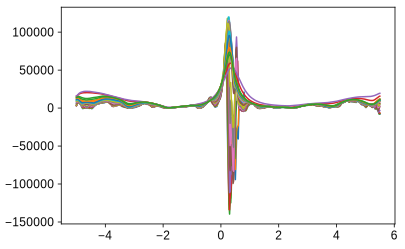

In [20]:
plt.figure()#6-8T(1 is 6T, 2 is 7T, 3 is 8T)
i = 3
plt.plot(data17.srframe_volt_p1_set[0, :], gaussian_filter(data17.lockin865_X[i, :], 0.7)/1e-9)
plt.plot(data18.srframe_volt_p1_set[0, :], gaussian_filter(data18.lockin865_X[i, :], 0.7)/1e-9)
plt.plot(data19.srframe_volt_p1_set[0, :], gaussian_filter(data19.lockin865_X[i, :], 0.7)/1e-9)
plt.plot(data20.srframe_volt_p1_set[0, :], gaussian_filter(data20.lockin865_X[i, :], 0.7)/1e-9)
plt.plot(data21.srframe_volt_p1_set[0, :], gaussian_filter(data21.lockin865_X[i, :], 0.7)/1e-9)
plt.plot(data22.srframe_volt_p1_set[0, :], gaussian_filter(data22.lockin865_X[i, :], 0.7)/1e-9)
plt.plot(data23.srframe_volt_p1_set[0, :], gaussian_filter(data23.lockin865_X[i, :], 0.7)/1e-9)
plt.plot(data24.srframe_volt_p1_set[0, :], gaussian_filter(data24.lockin865_X[i, :], 0.7)/1e-9)
plt.plot(data25.srframe_volt_p1_set[0, :], gaussian_filter(data25.lockin865_X[i, :], 0.7)/1e-9)
plt.plot(data26.srframe_volt_p1_set[0, :], gaussian_filter(data26.lockin865_X[i, :], 0.7)/1e-9)
plt.plot(data27.srframe_volt_p1_set[0, :], gaussian_filter(data27.lockin865_X[i, :], 0.7)/1e-9)
plt.plot(data28.srframe_volt_p1_set[0, :], gaussian_filter(data28.lockin865_X[i, :], 1.5)/1e-9)
plt.plot(data29.srframe_volt_p1_set[0, :], gaussian_filter(data29.lockin865_X[i, :], 1.5)/1e-9)
plt.plot(data30.srframe_volt_p1_set[0, :], gaussian_filter(data30.lockin865_X[i, :], 1.5)/1e-9)
plt.plot(data31.srframe_volt_p1_set[0, :], gaussian_filter(data31.lockin865_X[i, :], 1.5)/1e-9)
plt.plot(data32.srframe_volt_p1_set[0, :], gaussian_filter(data32.lockin865_X[i+1, :], 1.5)/1e-9)
plt.plot(data33.srframe_volt_p1_set[0, :], gaussian_filter(data33.lockin865_X[i+1, :], 1.5)/1e-9)
plt.plot(data34.srframe_volt_p1_set[0, :], gaussian_filter(data34.lockin865_X[i+1, :], 1.5)/1e-9)
plt.plot(data35.srframe_volt_p1_set[0, :], gaussian_filter(data35.lockin865_X[i+1, :], 1.5)/1e-9)
plt.plot(data36.srframe_volt_p1_set[0, :], gaussian_filter(data36.lockin865_X[i+1, :], 1.5)/1e-9)
plt.plot(data37.srframe_volt_p1_set[0, :], gaussian_filter(data37.lockin865_X[i+1, :], 1.5)/1e-9)
plt.plot(data38.srframe_volt_p1_set[0, :], gaussian_filter(data38.lockin865_X[i+1, :], 1.5)/1e-9)
plt.plot(data39.srframe_volt_p1_set[0, :], gaussian_filter(data39.lockin865_X[i+1, :], 1.5)/1e-9)
# plt.axis(axx)

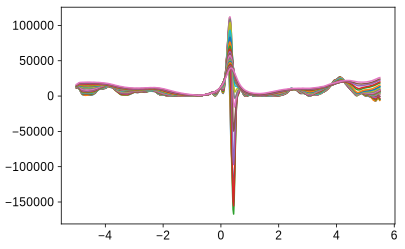

In [40]:
plt.figure()#low field 2-4T(0 is 2T, 1 is 3T, 2 is 3.5T, 3 is 4T)
i =3

plt.plot(data40.srframe_volt_p1_set[0, :], gaussian_filter(data40.lockin865_X[i, :], 1.5)/1e-9)
plt.plot(data41.srframe_volt_p1_set[0, :], gaussian_filter(data41.lockin865_X[i, :], 1.5)/1e-9)
plt.plot(data42.srframe_volt_p1_set[0, :], gaussian_filter(data42.lockin865_X[i, :], 1.5)/1e-9)
plt.plot(data43.srframe_volt_p1_set[0, :], gaussian_filter(data43.lockin865_X[i, :], 1.5)/1e-9)
plt.plot(data44.srframe_volt_p1_set[0, :], gaussian_filter(data44.lockin865_X[i, :], 1.5)/1e-9)
plt.plot(data45.srframe_volt_p1_set[0, :], gaussian_filter(data45.lockin865_X[i, :], 1.5)/1e-9)
plt.plot(data46.srframe_volt_p1_set[0, :], gaussian_filter(data46.lockin865_X[i, :], 1.5)/1e-9)
plt.plot(data47.srframe_volt_p1_set[0, :], gaussian_filter(data47.lockin865_X[i, :], 1.5)/1e-9)
plt.plot(data48.srframe_volt_p1_set[0, :], gaussian_filter(data48.lockin865_X[i, :], 1.5)/1e-9)
plt.plot(data49.srframe_volt_p1_set[0, :], gaussian_filter(data49.lockin865_X[i, :], 1.5)/1e-9)
plt.plot(data50.srframe_volt_p1_set[0, :], gaussian_filter(data50.lockin865_X[i, :], 1.5)/1e-9)
plt.plot(data51.srframe_volt_p1_set[0, :], gaussian_filter(data51.lockin865_X[i, :], 1.5)/1e-9)
plt.plot(data52.srframe_volt_p1_set[0, :], gaussian_filter(data52.lockin865_X[i, :], 1.5)/1e-9)
plt.plot(data53.srframe_volt_p1_set[0, :], gaussian_filter(data53.lockin865_X[i, :], 1.5)/1e-9)
plt.plot(data54.srframe_volt_p1_set[0, :], gaussian_filter(data54.lockin865_X[i, :], 1.5)/1e-9)
plt.plot(data55.srframe_volt_p1_set[0, :], gaussian_filter(data55.lockin865_X[i, :], 1.5)/1e-9)
plt.plot(data56.srframe_volt_p1_set[0, :], gaussian_filter(data56.lockin865_X[i, :], 1.5)/1e-9)
plt.plot(data57.srframe_volt_p1_set[0, :], gaussian_filter(data57.lockin865_X[i, :], 1.5)/1e-9)
plt.plot(data58.srframe_volt_p1_set[0, :], gaussian_filter(data58.lockin865_X[i, :], 1.5)/1e-9)
plt.plot(data59.srframe_volt_p1_set[0, :], gaussian_filter(data59.lockin865_X[i, :], 1.5)/1e-9)
plt.plot(data59.srframe_volt_p1_set[0, :], gaussian_filter(data59.lockin865_X[i, :], 1.5)/1e-9)
plt.plot(data60.srframe_volt_p1_set[0, :], gaussian_filter(data60.lockin865_X[i, :], 1.5)/1e-9)
plt.plot(data61.srframe_volt_p1_set[0, :], gaussian_filter(data61.lockin865_X[i, :], 1.5)/1e-9)
plt.plot(data62.srframe_volt_p1_set[0, :], gaussian_filter(data62.lockin865_X[i, :], 1.5)/1e-9)
plt.plot(data63.srframe_volt_p1_set[0, :], gaussian_filter(data63.lockin865_X[i, :], 1.5)/1e-9)
plt.plot(data64.srframe_volt_p1_set[0, :], gaussian_filter(data64.lockin865_X[i, :], 1.5)/1e-9)
plt.plot(data65.srframe_volt_p1_set[0, :], gaussian_filter(data65.lockin865_X[i, :], 1.5)/1e-9)
# plt.axis(axx)

## Combine 2T data for a T-dependence plot

In [75]:

Tvals = np.array([0.025, 0.250, 0.500, 0.750, 1, 1.25, 1.5, 1.75, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 7, 8, 9, 10, 12, 13, 15, 17, 20])
R02 = []
R03 = []
R04 = []
for i in range(40, 66):
    R02.append(eval('npd.Rxxfromdata(data{}, 1e-9, "lockin865")[0, :]'.format(i)))
    R03.append(eval('npd.Rxxfromdata(data{}, 1e-9, "lockin865")[1, :]'.format(i)))
    R04.append(eval('npd.Rxxfromdata(data{}, 1e-9, "lockin865")[3, :]'.format(i)))
    
# Tvalshigh = 
    
Rarr2 = np.vstack(R02)
Rarr3 = np.vstack(R03)
Rarr4 = np.vstack(R04)

Vbg = data40.srframe_volt_p1_set[0, :]
Vgatefull = 7.64
V0 = 0.34
nu = np.interp(Vbg, [V0 - Vgatefull, V0 + Vgatefull], [-4, 4])

In [93]:
Tvalshigh = np.array([0.025, 0.3, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 3, 5, 7, 10, 15, 20, 2.5, 3.5, 4, 4.5, 5.5, 6, 8, 9])
Tmap = np.argsort(Tvalshigh)
R05 = []
R06 = []
R07 = []
R08 = []
for i in range(17, 32):
    R05.append(eval('npd.Rxxfromdata(data{}, 1e-9, "lockin865")[0, :]'.format(i)))
    R06.append(eval('npd.Rxxfromdata(data{}, 1e-9, "lockin865")[1, :]'.format(i)))
    R07.append(eval('npd.Rxxfromdata(data{}, 1e-9, "lockin865")[2, :]'.format(i)))
    R08.append(eval('npd.Rxxfromdata(data{}, 1e-9, "lockin865")[3, :]'.format(i)))
    
for i in range(32, 40):
    R05.append(eval('npd.Rxxfromdata(data{}, 1e-9, "lockin865")[0, :]'.format(i)))
    R06.append(eval('npd.Rxxfromdata(data{}, 1e-9, "lockin865")[2, :]'.format(i)))
    R07.append(eval('npd.Rxxfromdata(data{}, 1e-9, "lockin865")[3, :]'.format(i)))
    R08.append(eval('npd.Rxxfromdata(data{}, 1e-9, "lockin865")[4, :]'.format(i)))
    
Rarr5 = np.vstack(R05)
Rarr6 = np.vstack(R06)
Rarr7 = np.vstack(R07)
Rarr8 = np.vstack(R08)

Tvalshigh = Tvalshigh[Tmap]
Rarr5 = Rarr5[Tmap, :]
Rarr6 = Rarr6[Tmap, :]
Rarr7 = Rarr7[Tmap, :]
Rarr8 = Rarr8[Tmap, :]

2T

(-2.7958115183246077, 2.701570680628272, 0, 20)

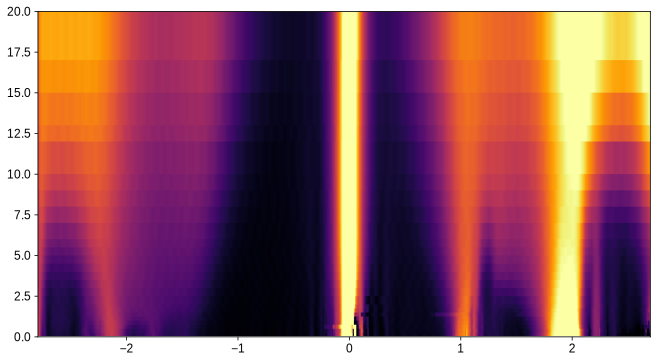

In [76]:
plt.figure(figsize=(11, 6))
plt.pcolormesh(nu, Tvals, Rarr2/1000, cmap='inferno', vmin=0, vmax=20, rasterized=True)

3T

(-2.7958115183246077, 2.701570680628272, 0, 20)

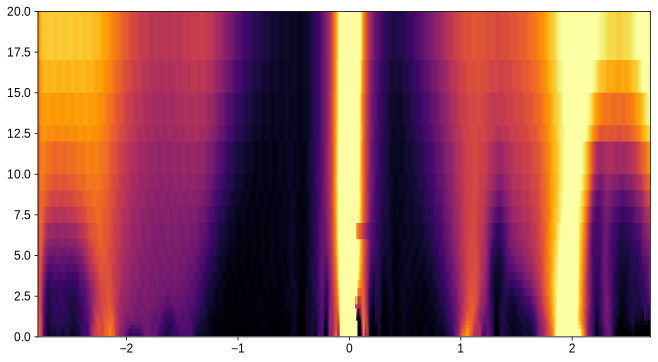

In [77]:
plt.figure(figsize=(11, 6))
plt.pcolormesh(nu, Tvals, Rarr3/1000, cmap='inferno', vmin=0, vmax=20, rasterized=True)

4 T

(-2.7958115183246077, 2.701570680628272, 0, 20)

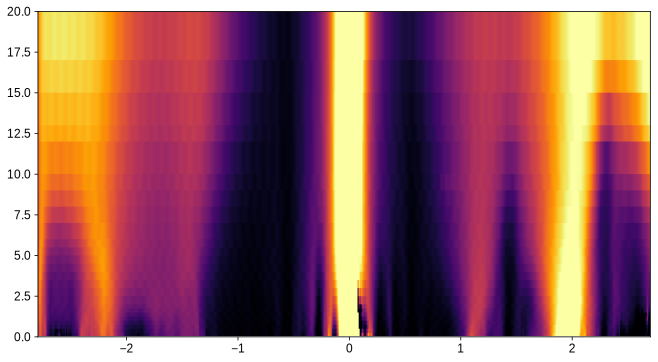

In [78]:
plt.figure(figsize=(11, 6))
plt.pcolormesh(nu, Tvals, Rarr4/1000, cmap='inferno', vmin=0, vmax=20, rasterized=True)

5 T

(-2.7958115183246077, 2.701570680628272, 0, 20)

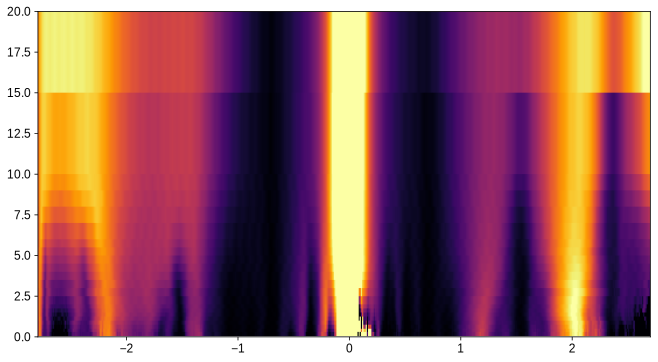

In [86]:
plt.figure(figsize=(11, 6))
plt.pcolormesh(nu, Tvalshigh, Rarr5/1000, cmap='inferno', vmin=0, vmax=20, rasterized=True)

6 T

(-2.7958115183246077, 2.701570680628272, 0, 20)

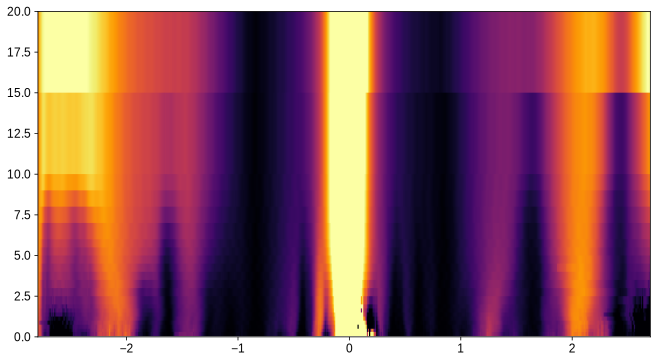

In [87]:
plt.figure(figsize=(11, 6))
plt.pcolormesh(nu, Tvalshigh, Rarr6/1000, cmap='inferno', vmin=0, vmax=20, rasterized=True)

7 T

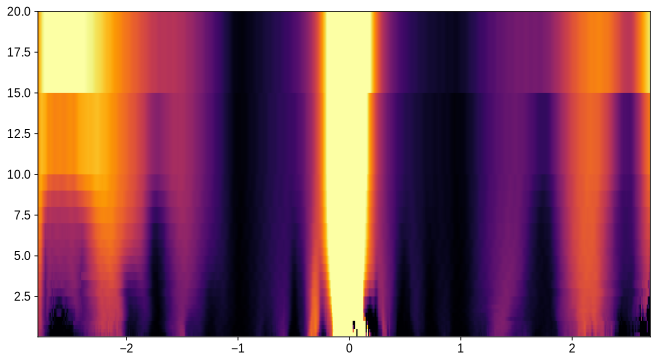

In [108]:
plt.figure(figsize=(11, 6))
plt.pcolormesh(nu, Tvalshigh, Rarr7/1000, cmap='inferno', vmin=0, vmax=20, rasterized=True)

8 T

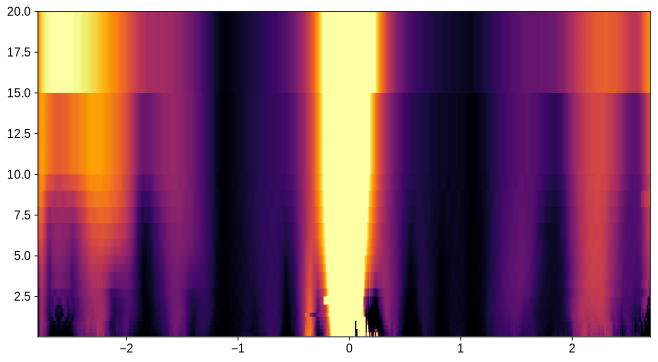

In [107]:
plt.figure(figsize=(11, 6))
plt.pcolormesh(nu, Tvalshigh, Rarr8/1000, cmap='inferno', vmin=0, vmax=20, rasterized=True)

Now for sort of fan diagrams at different Temps

In [111]:
Tvalshighind = np.concatenate(([0], np.arange(2, len(Tvalshigh))))
Tvalsind = np.concatenate(([0], np.arange(2, 21), [23, 25]))
Tvalsfans = Tvalshigh[Tvalshighind]

Rfans = []
for i in range(len(Tvalshighind)):
    Rfans.append(np.vstack((Rarr2[Tvalsind[i], :], Rarr3[Tvalsind[i], :], Rarr4[Tvalsind[i], :], Rarr5[Tvalshighind[i], :], Rarr6[Tvalshighind[i], :], Rarr7[Tvalshighind[i], :], Rarr8[Tvalshighind[i], :])))
    
Rfans = np.array(Rfans)
Bfans = np.arange(2, 9)

Lowest temp 25 mK

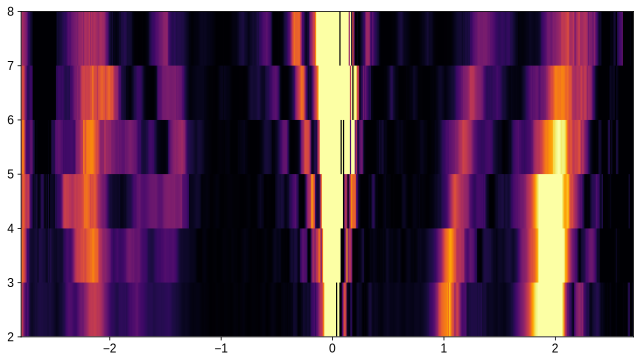

In [113]:
plt.figure(figsize=(11, 6))
plt.pcolormesh(nu, Bfans, Rfans[0]/1000, cmap='inferno', vmin=0, vmax=20, rasterized=True)

2K

In [116]:
Tvalsfans[7]

2.0

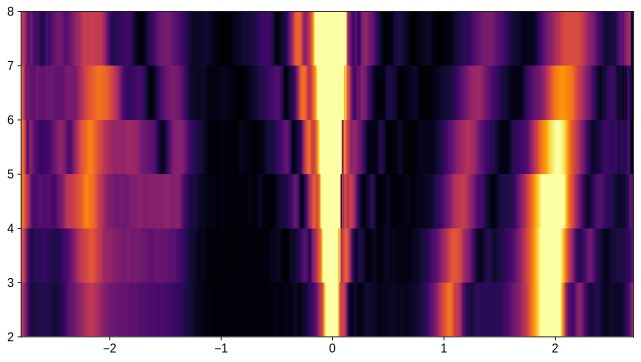

In [117]:
plt.figure(figsize=(11, 6))
plt.pcolormesh(nu, Bfans, Rfans[7]/1000, cmap='inferno', vmin=0, vmax=20, rasterized=True)

5K

In [120]:
Tvalsfans[13]

5.0

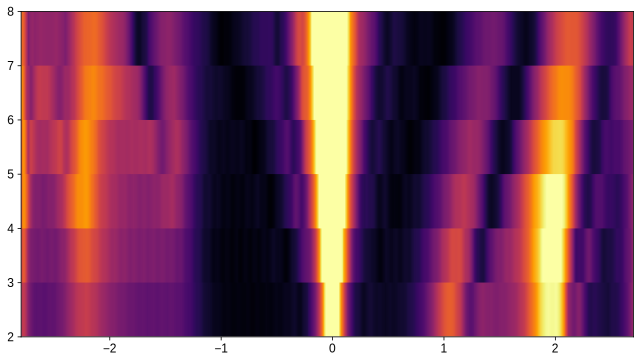

In [121]:
plt.figure(figsize=(11, 6))
plt.pcolormesh(nu, Bfans, Rfans[13]/1000, cmap='inferno', vmin=0, vmax=20, rasterized=True)

7K

In [136]:
Tvalsfans[16]

7.0

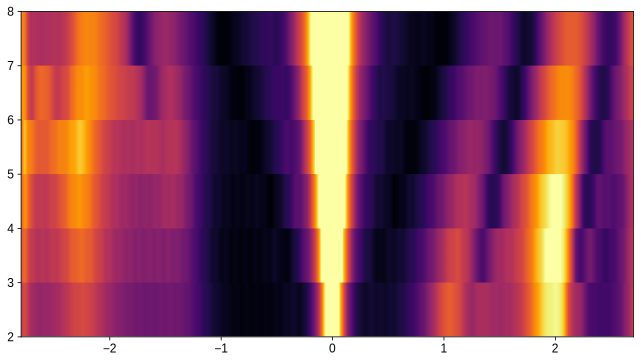

In [137]:
plt.figure(figsize=(11, 6))
plt.pcolormesh(nu, Bfans, Rfans[16]/1000, cmap='inferno', vmin=0, vmax=20, rasterized=True)

10K

In [125]:
Tvalsfans[19]

10.0

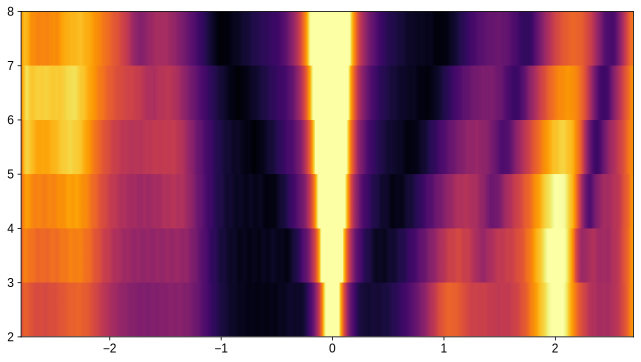

In [126]:
plt.figure(figsize=(11, 6))
plt.pcolormesh(nu, Bfans, Rfans[19]/1000, cmap='inferno', vmin=0, vmax=20, rasterized=True)

15K

In [130]:
Tvalsfans[20]

15.0

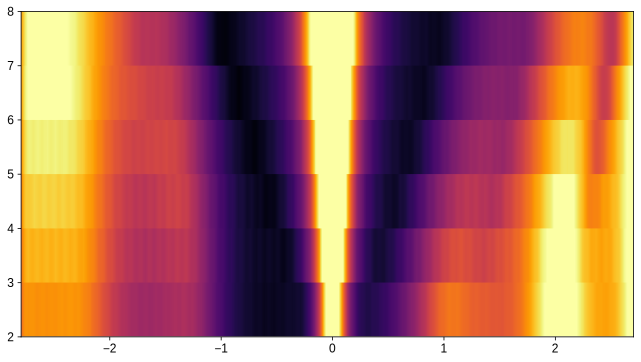

In [131]:
plt.figure(figsize=(11, 6))
plt.pcolormesh(nu, Bfans, Rfans[20]/1000, cmap='inferno', vmin=0, vmax=20, rasterized=True)

20K

In [132]:
Tvalsfans[21]

20.0

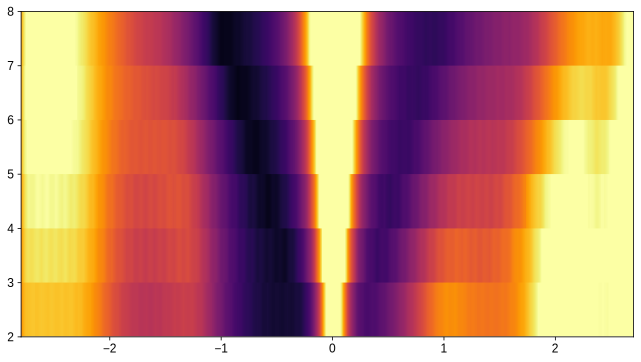

In [133]:
plt.figure(figsize=(11, 6))
plt.pcolormesh(nu, Bfans, Rfans[21]/1000, cmap='inferno', vmin=0, vmax=20, rasterized=True)

# nu = -1

## Data

In [27]:
# 5-8T
Tvals = np.array([0.025, 0.3, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 3, 5, 7, 10, 15, 20, 2.5, 3.5, 4, 4.5, 5.5, 6, 8, 9])
bvals = np.array([5, 6, 7, 8])
filtn = 1

gptsLLm1 = np.array([0, -0.06, -0.12, -0.2])
indptsLLm1 = npd.val_to_index(gptsLLm1, data17.srframe_volt_p1_set[0, :])
RxxLLm1 = np.zeros((len(Tvals), 4))

for i in range(1):
    gind = indptsLLm1[i]
    RxxLLm1[:, i] = np.array((gaussian_filter(data17.lockin865_X[i, gind], filtn)/1e-9, 
                       gaussian_filter(data18.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data19.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data20.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data21.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data22.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data23.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data24.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data25.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data26.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data27.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data28.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data29.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data30.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data31.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data32.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data33.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data34.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data35.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data36.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data37.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data38.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data39.lockin865_X[i, gind], filtn)/1e-9))
for i in range(1,4):
    gind = indptsLLm1[i]
    RxxLLm1[:, i] = np.array((gaussian_filter(data17.lockin865_X[i, gind], filtn)/1e-9, 
                       gaussian_filter(data18.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data19.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data20.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data21.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data22.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data23.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data24.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data25.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data26.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data27.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data28.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data29.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data30.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data31.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data32.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data33.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data34.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data35.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data36.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data37.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data38.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data39.lockin865_X[i+1, gind], filtn)/1e-9))
    
    
Tvalslow = np.array([0.025, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 7, 8, 9, 10, 12, 13, 15, 17, 20])
bvalslow = np.array([2, 3, 3.5, 4])
gptsLLm1low = np.array([0.16, 0.12, 0.1, 0.08])
indptsLLm1low = npd.val_to_index(gptsLLm1low, data40.srframe_volt_p1_set[0, :])
RxxLLm1low = np.zeros((len(Tvalslow), 4))
for i in range(4):
    gindlow = indptsLLm1low[i]
    RxxLLm1low[:, i] = np.array((gaussian_filter(data40.lockin865_X[i, gindlow], filtn)/1e-9, 
                       gaussian_filter(data41.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data42.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data43.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data44.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data45.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data46.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data47.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data48.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data49.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data50.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data51.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data52.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data53.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data54.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data55.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data56.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data57.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data58.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data59.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data60.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data61.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data62.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data63.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data64.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data65.lockin865_X[i, gindlow], filtn)/1e-9))   

-0.06 is not a value in the array
Plotted -0.06 instead
0.10 is not a value in the array
Plotted 0.10 instead
0.08 is not a value in the array
Plotted 0.08 instead


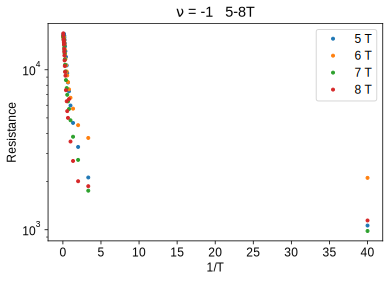

In [28]:
plt.figure()
for i in range(4):
    plt.semilogy(1/Tvals, RxxLLm1[:, i], '.', label='{} T'.format(i+5))
    
plt.xlabel('1/T')
plt.ylabel('Resistance')
plt.title( r'$\nu$ = -1   5-8T')
plt.legend()

In [29]:
Tvals

array([ 0.025,  0.3  ,  0.5  ,  0.75 ,  1.   ,  1.25 ,  1.5  ,  1.75 ,
        2.   ,  3.   ,  5.   ,  7.   , 10.   , 15.   , 20.   ,  2.5  ,
        3.5  ,  4.   ,  4.5  ,  5.5  ,  6.   ,  8.   ,  9.   ])

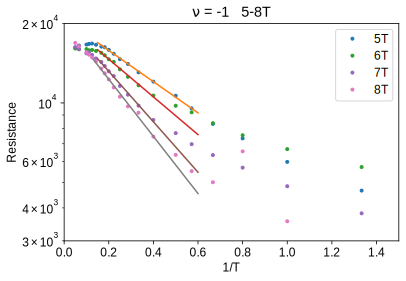

In [30]:
n1, n2 = 6, 11
n3, n4 = 15, 20
m5, b5 = np.polyfit(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.log(np.concatenate((RxxLLm1[n1:n2,0], RxxLLm1[n3:n4,0]))), 1)

plt.figure()
plt.semilogy(1/Tvals, RxxLLm1[:, 0], '.', label='5T')
#plt.semilogy(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.concatenate((RxxLLm1[n1:n2,0], RxxLLm1[n3:n4,0])), '.r')
x = np.linspace(0.15, 0.6, 100)
plt.semilogy(x, np.exp(m5*x + b5))


n1, n2 = 9, 11
n3, n4 = 15, 21
m6, b6 = np.polyfit(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.log(np.concatenate((RxxLLm1[n1:n2,1], RxxLLm1[n3:n4,1]))), 1)

plt.semilogy(1/Tvals, RxxLLm1[:, 1], '.', label='6T')
#plt.semilogy(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.concatenate((RxxLLm1[n1:n2,1], RxxLLm1[n3:n4,1])), '.r')
x = np.linspace(0.15, 0.6, 100)
plt.semilogy(x, np.exp(m6*x + b6))


n1, n2 = 9, 11
n3, n4 = 15, 21
m7, b7 = np.polyfit(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.log(np.concatenate((RxxLLm1[n1:n2,2], RxxLLm1[n3:n4,2]))), 1)

plt.semilogy(1/Tvals, RxxLLm1[:, 2], '.', label='7T')
#plt.semilogy(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.concatenate((RxxLLm1[n1:n2,2], RxxLLm1[n3:n4,2])), '.r')
x = np.linspace(0.15, 0.6, 100)
plt.semilogy(x, np.exp(m7*x + b7))


n1, n2 = 9, 12
n3, n4 = 15, 21
m8, b8 = np.polyfit(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.log(np.concatenate((RxxLLm1[n1:n2,3], RxxLLm1[n3:n4,3]))), 1)

plt.semilogy(1/Tvals, RxxLLm1[:, 3], '.', label='8T')
#plt.semilogy(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.concatenate((RxxLLm1[n1:n2,3], RxxLLm1[n3:n4,3])), '.r')
x = np.linspace(0.13, 0.6, 100)
plt.semilogy(x, np.exp(m8*x + b8))

plt.axis([0, 1.5, 3000, 20000])
plt.xlabel('1/T')
plt.ylabel('Resistance')
plt.title( r'$\nu$ = -1   5-8T')

plt.legend()


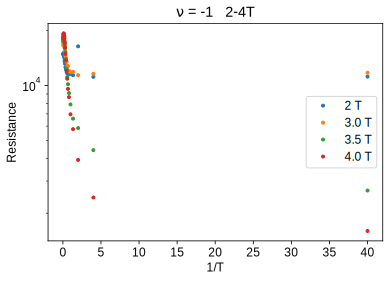

In [31]:
plt.figure()
for i in range(1):
    plt.semilogy(1/Tvalslow, RxxLLm1low[:, i], '.', label='2 T')
for i in range(1,4):
    plt.semilogy(1/Tvalslow, RxxLLm1low[:, i], '.', label='{} T'.format(i*0.5+2.5))
plt.xlabel('1/T')
plt.ylabel('Resistance')
plt.title( r'$\nu$ = -1   2-4T')
plt.legend()

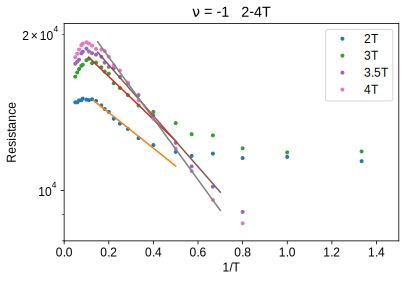

In [32]:
n1, n2 = 9, 18
m2, b2 = np.polyfit(1/Tvalslow[n1:n2], np.log(RxxLLm1low[n1:n2, 0]), 1)

plt.figure()
plt.semilogy(1/Tvalslow, RxxLLm1low[:,0], '.', label='2T')
#plt.semilogy(1/Tvalslow[n1:n2], RxxLLm1low[n1:n2, 0], '.r')
x = np.linspace(0.13, 0.5, 100)
plt.semilogy(x, np.exp(m2*x + b2))


n1, n2 = 10, 20
m3, b3 = np.polyfit(1/Tvalslow[n1:n2], np.log(RxxLLm1low[n1:n2, 1]), 1)

plt.semilogy(1/Tvalslow, RxxLLm1low[:,1], '.', label='3T')
#plt.semilogy(1/Tvalslow[n1:n2], RxxLLm1low[n1:n2, 1], '.r')
x = np.linspace(0.11, 0.5, 100)
plt.semilogy(x, np.exp(m3*x + b3))


n1, n2 = 5, 17
m3p5, b3p5 = np.polyfit(1/Tvalslow[n1:n2], np.log(RxxLLm1low[n1:n2, 2]), 1)

plt.semilogy(1/Tvalslow, RxxLLm1low[:,2], '.', label='3.5T')
#plt.semilogy(1/Tvalslow[n1:n2], RxxLLm1low[n1:n2, 2], '.r')
x = np.linspace(0.15, 0.7, 100)
plt.semilogy(x, np.exp(m3p5*x + b3p5))

n1, n2 = 6, 16
m4, b4 = np.polyfit(1/Tvalslow[n1:n2], np.log(RxxLLm1low[n1:n2, 3]), 1)

plt.semilogy(1/Tvalslow, RxxLLm1low[:,3], '.', label='4T')
#plt.semilogy(1/Tvalslow[n1:n2], RxxLLm1low[n1:n2, 3], '.r')
x = np.linspace(0.15, 0.7, 100)
plt.semilogy(x, np.exp(m4*x + b4))


plt.axis([0, 1.5, 8000, 21000])
plt.xlabel('1/T')
plt.ylabel('Resistance')
plt.title( r'$\nu$ = -1   2-4T')

plt.legend()

Text(0.5, 1.0, '$\\nu$ = -1 gap')

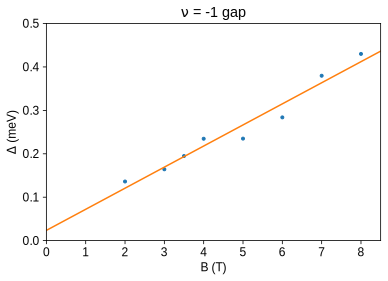

In [33]:
plt.figure()
plt.plot([2, 3, 3.5, 4, 5, 6, 7, 8], np.array([m2, m3, m3p5, m4, m5, m6, m7, m8])*-1.381e-23/1.602e-19*2*1000, '.')
# plt.errorbar([2, 3], np.array([-0.78985651, -0.95287])*-1.381e-23/1.602e-19*2*1000, yerr=np.array([0.04057, 0.04249])*-1.381e-23/1.602e-19*2*1000, lw=0, elinewidth=2, capsize=2)
plt.axis([0, 8.5, 0, 0.5])
mm1, bm1 = np.polyfit([2, 3, 3.5, 4, 5, 6, 7, 8], np.array([m2, m3, m3p5, m4, m5, m6, m7, m8])*-1.381e-23/1.602e-19*2*1000, 1)
x = np.linspace(0, 8.5, 100)
plt.plot(x, mm1*x + bm1)
plt.xlabel('B (T)')
plt.ylabel('$\Delta$ (meV)')
plt.title( r'$\nu$ = -1 gap')

## Compiling, statistics, and plots

### Example for B = 2T

In [34]:
Tfit = LinearModel()
n1, n2 = 9, 18
result = Tfit.fit(np.log(RxxLLm1low[n1:n2, 0]), slope=-1, intercept=10, x=1/Tvalslow[n1:n2])
print(result.fit_report())

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 9
    # variables        = 2
    chi-square         = 5.6205e-04
    reduced chi-square = 8.0293e-05
    Akaike info crit   = -83.1303123
    Bayesian info crit = -82.7358631
[[Variables]]
    slope:     -0.78985651 +/- 0.03767768 (4.77%) (init = -1)
    intercept:  9.71454775 +/- 0.00961310 (0.10%) (init = 10)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.951


In [35]:
print(result.ci_report())  # not sure why this is different, but it takes longer to calculate. Just use the above method to start

              99.73%    95.45%    68.27%    _BEST_    68.27%    95.45%    99.73%
 slope    :  -0.17068  -0.09151  -0.04057  -0.78986  +0.04057  +0.09151  +0.17068
 intercept:  -0.04358  -0.02345  -0.01044   9.71455  +0.01044  +0.02345  +0.04358


### Now for all fields

In [168]:
Tvals  # need to sort the first array since the temps are out of order (just high fields)

array([ 0.025,  0.3  ,  0.5  ,  0.75 ,  1.   ,  1.25 ,  1.5  ,  1.75 ,
        2.   ,  3.   ,  5.   ,  7.   , 10.   , 15.   , 20.   ,  2.5  ,
        3.5  ,  4.   ,  4.5  ,  5.5  ,  6.   ,  8.   ,  9.   ])

In [169]:
Tmap = np.argsort(Tvals)
Tvalss = np.sort(Tvals)
RxxLLm1s = RxxLLm1[Tmap, :]

In [170]:
Bm1 = [2, 3, 3.5, 4, 5, 6, 7, 8]

#low fields
n1 = [9, 10, 5, 6]
n2 = [18, 20, 17, 16]
xvals = []
yvals = []
for i in range(4):
    xvals.append(1/Tvalslow[n1[i]:n2[i]])
    yvals.append(np.log(RxxLLm1low[n1[i]:n2[i], i]))

#high fields
n1 = [6, 9, 9, 9]
n2 = [16, 17, 17, 18]
for i in range(4):
    xvals.append(1/Tvalss[n1[i]:n2[i]])
    yvals.append(np.log(RxxLLm1s[n1[i]:n2[i], i]))

In [171]:
Tfit = LinearModel()
num1slopes = np.zeros(len(Bm1))
num1bs = np.zeros(len(Bm1))
num1stderrs = np.zeros(len(Bm1))
num1conferrs_upper = np.zeros(len(Bm1))
num1conferrs_lower = np.zeros(len(Bm1))
modeldevfields = []
for i in range(len(Bm1)):
    result = Tfit.fit(yvals[i], slope=-1, intercept=10, x=xvals[i])
    num1slopes[i] = result.params['slope'].value
    num1stderrs[i] = result.params['slope'].stderr
    num1bs[i] = result.params['intercept'].value
    modeldevfields.append(result.eval_uncertainty(xvals[i]))
    cislope = result.conf_interval()['slope']
    num1conferrs_upper[i] = cislope[1][1] - result.params['slope'].value
    num1conferrs_lower[i] = -1*(cislope[5][1] - result.params['slope'].value)
    
num1gaps = num1slopes*-1.381e-23/1.602e-19*2*1000
num1gaperrs = num1stderrs*-1.381e-23/1.602e-19*2*1000
num1gapconferrs_upper = num1conferrs_upper*-1.381e-23/1.602e-19*2*1000
num1gapconferrs_lower = num1conferrs_lower*-1.381e-23/1.602e-19*2*1000

result = Tfit.fit(num1gaps, slope=0.05, intercept=0, x=Bm1)
num1gapfitslope = result.params['slope'].value
num1gapfitb = result.params['intercept'].value
num1gapfitstderr = result.params['slope'].stderr
modelB = np.linspace(0, 8.5, 20)
modeldev = result.eval_uncertainty(x=modelB, sigma=2)
ci = result.conf_interval()['slope']
num1slopeconferr_upper = ci[5][1] - num1gapfitslope
num1slopeconferr_lower = num1gapfitslope - ci[1][1]
print(result.ci_report())

              99.73%    95.45%    68.27%    _BEST_    68.27%    95.45%    99.73%
 slope    :  -0.02034  -0.01044  -0.00452   0.04857  +0.00452  +0.01044  +0.02034
 intercept:  -0.10549  -0.05413  -0.02346   0.02360  +0.02346  +0.05413  +0.10549


In [172]:
result.params  # the standard error here varies some from the confidence interval. likely because of the small amount of data points
# since the CI uses an F-test (nonlinear test) and not just the covariance-matrix-based standard deviations.

Parameters([('slope',
             <Parameter 'slope', value=0.048566714028100234 +/- 0.00415, bounds=[-inf:inf]>),
            ('intercept',
             <Parameter 'intercept', value=0.023601782464092405 +/- 0.0215, bounds=[-inf:inf]>)])

### A test of emcee MCMC methods on this data fit

In [41]:
p = result.params

In [42]:
p.add('__lnsigma', value=np.log(0.1), min=np.log(0.001), max=np.log(2))

In [43]:
# Try also emcee on the last graph for estimation of confidence intervals
x = np.array(Bm1)
y = num1gaps
def residuals(params):
    v = params.valuesdict()
    return x*v['slope'] + v['intercept'] - y

emresult = lmfit.minimize(residuals, method='emcee', nan_policy='omit', burn=200, steps=10000, thin=3, nwalkers=10, is_weighted=False, params=p)

100%|██████████| 10000/10000 [00:15<00:00, 642.31it/s]


In [44]:
lmfit.report_fit(emresult)

[[Fit Statistics]]
    # fitting method   = emcee
    # function evals   = 100000
    # data points      = 8
    # variables        = 3
    chi-square         = 5.35558193
    reduced chi-square = 1.07111639
    Akaike info crit   = 2.78958262
    Bayesian info crit = 3.02790724
[[Variables]]
    slope:      0.04845125 +/- 0.00440805 (9.10%) (init = 0.04856671)
    intercept:  0.02350113 +/- 0.02295143 (97.66%) (init = 0.02360178)
    __lnsigma: -3.72782692 +/- 0.30293037 (8.13%) (init = -2.302585)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.924


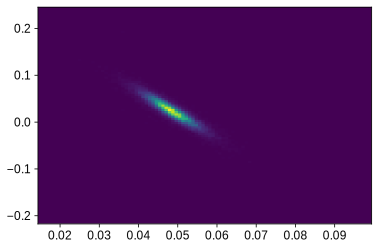

In [46]:
plt.figure()
plot = plt.hist2d(emresult.flatchain['slope'], emresult.flatchain['intercept'], bins=100, rasterized=True)

In [47]:
np.percentile(emresult.flatchain['slope'], [5, 50, 95])  # a way to get credible ranges of certain values

array([0.04066688, 0.04845125, 0.05652718])

In [48]:
50 - 95.45/2  # 95.45 is the integral over 2-sigma in standard normal distributions

2.2749999999999986

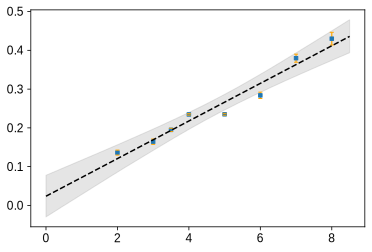

In [49]:
yfit = emresult.flatchain['slope'][:, None]*modelB + emresult.flatchain['intercept'][:, None]
modelmean = yfit.mean(0)
modelstd = yfit.std(0)
modellower_upper = np.percentile(yfit, [2.275, 97.725], axis=0)

plt.figure()
plt.plot(Bm1, num1gaps, '.', marker='s', ms=3.5)
plt.errorbar(Bm1, num1gaps, yerr=num1gaperrs, color='orange', lw=0, elinewidth=1.2, capsize=2)
plt.plot(modelB, modelmean, '--k')
# plt.fill_between(modelB, modelmean-modelstd*2, modelmean+modelstd*2, color='gray', alpha=0.2)
plt.fill_between(modelB, modellower_upper[0], modellower_upper[1], color='gray', alpha=0.2)  # The "2-sigma" credible range

## Overall Plots

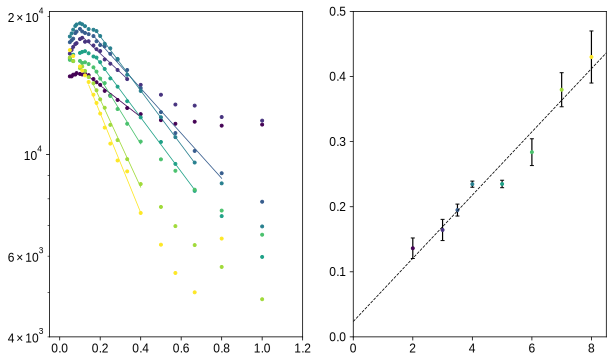

In [173]:
cs = plt.get_cmap('viridis')([i/(8-1) for i in range(8)])
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
for i in range(8):
    if i < 4:
        R = RxxLLm1low[:, i]
        T = Tvalslow
    else:
        R = RxxLLm1s[:, i-4]
        T = Tvalss
    ax[0].semilogy(1/T, R, '.', color=cs[i])
    x1 = np.linspace(xvals[i][0], xvals[i][-1], 10)
    ax[0].semilogy(x1, np.exp(num1slopes[i]*x1 + num1bs[i]), lw=0.8, color=cs[i])
    ax[1].plot(Bm1[i], num1gaps[i], '.', color=cs[i])
    
    
ax[1].errorbar(Bm1, num1gaps, yerr=np.array([num1gapconferrs_lower, num1gapconferrs_upper]), color='k', lw=0, elinewidth=1.2, capsize=2)
    
ax[0].axis([-0.05, 1.2, 4e3, 2.05e4])
ax[1].axis([0, 8.5, 0, 0.5])
modelbestfit = modelB*num1gapfitslope + num1gapfitb
ax[1].plot(modelB, modelbestfit, 'k--', lw=0.8)
# ax[1].plot(Bm1, result.best_fit, 'k--', lw=0.8)
# ax[1].fill_between(modelB, modelbestfit-modeldev, modelbestfit+modeldev, color='gray', alpha=0.2)

# nu = -2

## Data

In [51]:
Tvals = np.array([0.025, 0.3, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 3, 5, 7, 10, 15, 20, 2.5, 3.5, 4, 4.5, 5.5, 6, 8, 9])
bvals = np.array([5, 6, 7, 8])
filtn = 1

gptsLLm2 = np.array([-0.32, -0.46, -0.62, -0.74])
indptsLLm2 = npd.val_to_index(gptsLLm2, data17.srframe_volt_p1_set[0, :])
RxxLLm2 = np.zeros((len(Tvals), 4))

for i in range(1):
    gind = indptsLLm2[i]
    RxxLLm2[:, i] = np.array((gaussian_filter(data17.lockin865_X[i, gind], filtn)/1e-9, 
                       gaussian_filter(data18.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data19.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data20.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data21.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data22.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data23.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data24.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data25.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data26.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data27.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data28.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data29.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data30.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data31.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data32.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data33.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data34.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data35.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data36.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data37.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data38.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data39.lockin865_X[i, gind], filtn)/1e-9))
for i in range(1,4):
    gind = indptsLLm2[i]
    RxxLLm2[:, i] = np.array((gaussian_filter(data17.lockin865_X[i, gind], filtn)/1e-9, 
                       gaussian_filter(data18.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data19.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data20.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data21.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data22.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data23.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data24.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data25.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data26.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data27.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data28.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data29.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data30.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data31.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data32.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data33.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data34.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data35.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data36.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data37.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data38.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data39.lockin865_X[i+1, gind], filtn)/1e-9))
    
Tvalslow = np.array([0.025, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 7, 8, 9, 10, 12, 13, 15, 17, 20])
bvalslow = np.array([2, 3, 3.5, 4])
gptsLLm2low = np.array([0.04, -0.08, -0.14, -0.18])
indptsLLm2low = npd.val_to_index(gptsLLm2low, data40.srframe_volt_p1_set[0, :])
RxxLLm2low = np.zeros((len(Tvalslow), 4))
for i in range(4):
    gindlow = indptsLLm2low[i]
    RxxLLm2low[:, i] = np.array((gaussian_filter(data40.lockin865_X[i, gindlow], filtn)/1e-9, 
                       gaussian_filter(data41.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data42.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data43.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data44.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data45.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data46.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data47.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data48.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data49.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data50.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data51.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data52.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data53.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data54.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data55.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data56.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data57.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data58.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data59.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data60.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data61.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data62.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data63.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data64.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data65.lockin865_X[i, gindlow], filtn)/1e-9))   

-0.08 is not a value in the array
Plotted -0.08 instead


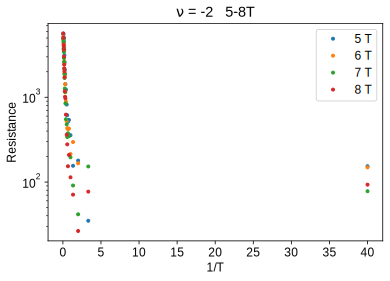

In [52]:
plt.figure()
for i in range(4):
    plt.semilogy(1/Tvals, RxxLLm2[:, i], '.', label='{} T'.format(i+5))
plt.xlabel('1/T')
plt.ylabel('Resistance')
plt.title( r'$\nu$ = -2   5-8T')
plt.legend()

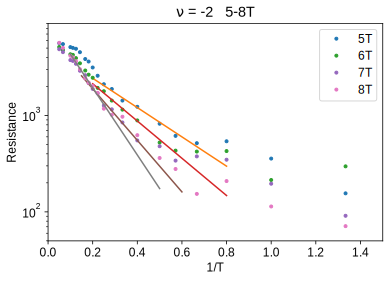

In [53]:
n1, n2 = 6, 10
n3, n4 = 15, 18
m25, b25 = np.polyfit(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.log(np.concatenate((RxxLLm2[n1:n2,0], RxxLLm2[n3:n4,0]))), 1)

plt.figure()
plt.semilogy(1/Tvals, RxxLLm2[:, 0], '.', label='5T')
#plt.semilogy(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.concatenate((RxxLLm2[n1:n2,0], RxxLLm2[n3:n4,0])), '.r')
x = np.linspace(0.2, 0.8, 100)
plt.semilogy(x, np.exp(m25*x + b25))


n1, n2 = 7, 10
n3, n4 = 15, 19
m26, b26 = np.polyfit(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.log(np.concatenate((RxxLLm2[n1:n2,1], RxxLLm2[n3:n4,1]))), 1)


plt.semilogy(1/Tvals, RxxLLm2[:, 1], '.', label='6T')
#plt.semilogy(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.concatenate((RxxLLm2[n1:n2,1], RxxLLm2[n3:n4,1])), '.r')
x = np.linspace(0.2, 0.8, 100)
plt.semilogy(x, np.exp(m26*x + b26))


n1, n2 = 9, 11
n3, n4 = 15, 20
m27, b27 = np.polyfit(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.log(np.concatenate((RxxLLm2[n1:n2,2], RxxLLm2[n3:n4,2]))), 1)


plt.semilogy(1/Tvals, RxxLLm2[:, 2], '.', label='7T')
#plt.semilogy(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.concatenate((RxxLLm2[n1:n2,2], RxxLLm2[n3:n4,2])), '.r')
x = np.linspace(0.15, 0.6, 100)
plt.semilogy(x, np.exp(m27*x + b27))


n1, n2 = 10, 12
n3, n4 = 16, 22
m28, b28 = np.polyfit(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.log(np.concatenate((RxxLLm2[n1:n2,3], RxxLLm2[n3:n4,3]))), 1)


plt.semilogy(1/Tvals, RxxLLm2[:, 3], '.', label='8T')
#plt.semilogy(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.concatenate((RxxLLm2[n1:n2,3], RxxLLm2[n3:n4,3])), '.r')
x = np.linspace(0.1, 0.5, 100)
plt.semilogy(x, np.exp(m28*x + b28))

plt.axis([0, 1.5, 50, 9000])
plt.xlabel('1/T')
plt.ylabel('Resistance')
plt.title( r'$\nu$ = -2   5-8T')

plt.legend()

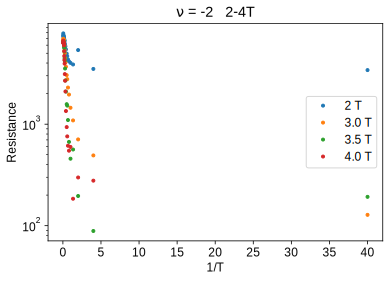

In [54]:
plt.figure()
for i in range(1):
    plt.semilogy(1/Tvalslow, RxxLLm2low[:, i], '.', label='2 T')
for i in range(1,4):
    plt.semilogy(1/Tvalslow, RxxLLm2low[:, i], '.', label='{} T'.format(i*0.5+2.5))
plt.xlabel('1/T')
plt.ylabel('Resistance')
plt.title( r'$\nu$ = -2   2-4T')
plt.legend()

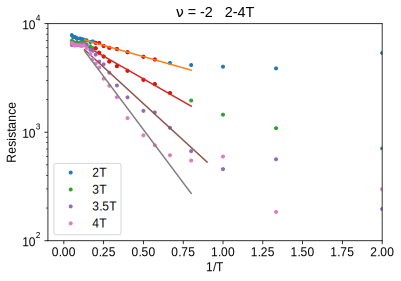

In [55]:
n1, n2 = 7, 15
m22, b22 = np.polyfit(1/Tvalslow[n1:n2], np.log(RxxLLm2low[n1:n2, 0]), 1)

plt.figure()
plt.semilogy(1/Tvalslow, RxxLLm2low[:,0], '.', label='2T')
plt.semilogy(1/Tvalslow[n1:n2], RxxLLm2low[n1:n2, 0], '.r')
x = np.linspace(0.13, 0.8, 100)
plt.semilogy(x, np.exp(m22*x + b22))

n1, n2 = 6, 15
m23, b23 = np.polyfit(1/Tvalslow[n1:n2], np.log(RxxLLm2low[n1:n2, 1]), 1)

plt.semilogy(1/Tvalslow, RxxLLm2low[:,1], '.', label='3T')
plt.semilogy(1/Tvalslow[n1:n2], RxxLLm2low[n1:n2, 1], '.r')
x = np.linspace(0.13, 0.8, 100)
plt.semilogy(x, np.exp(m23*x + b23))

n1, n2 = 4, 16
m23p5, b23p5 = np.polyfit(1/Tvalslow[n1:n2], np.log(RxxLLm2low[n1:n2, 2]), 1)

plt.semilogy(1/Tvalslow, RxxLLm2low[:,2], '.', label='3.5T')
#plt.semilogy(1/Tvalslow[n1:n2], RxxLLm2low[n1:n2, 2], '.r')
x = np.linspace(0.13, 0.9, 100)
plt.semilogy(x, np.exp(m23p5*x + b23p5))

n1, n2 = 6, 17
m24, b24 = np.polyfit(1/Tvalslow[n1:n2], np.log(RxxLLm2low[n1:n2, 3]), 1)

plt.semilogy(1/Tvalslow, RxxLLm2low[:,3], '.', label='4T')
#plt.semilogy(1/Tvalslow[n1:n2], RxxLLm2low[n1:n2, 3], '.r')
x = np.linspace(0.13, 0.8, 100)
plt.semilogy(x, np.exp(m24*x + b24))




plt.axis([-0.1, 2, 100, 10000])
plt.xlabel('1/T')
plt.ylabel('Resistance')
plt.title( r'$\nu$ = -2   2-4T')

plt.legend()

Text(0.5, 1.0, '$\\nu$ = -2  gap')

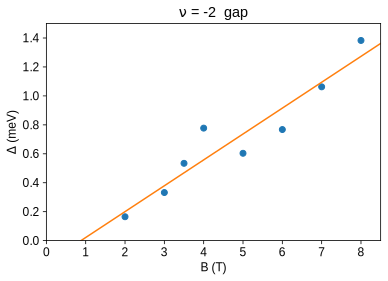

In [56]:
plt.figure()
plt.plot([2, 3, 3.5, 4, 5, 6, 7, 8], np.array([m22, m23, m23p5, m24, m25, m26, m27, m28])*-1.381e-23/1.602e-19*2*1000, 'o')
plt.axis([0, 8.5, 0, 1.5])
mm2, bm2 = np.polyfit([2, 3, 3.5, 4, 5, 6, 7, 8], np.array([m22, m23, m23p5, m24, m25, m26, m27, m28])*-1.381e-23/1.602e-19*2*1000, 1)
x = np.linspace(0, 8.5, 100)
plt.plot(x, mm2*x + bm2)
plt.xlabel('B (T)')
plt.ylabel('$\Delta$ (meV)')
plt.title( r'$\nu$ = -2  gap')

## Compiling, statistics, and plots

In [174]:
Tvals # needs some recompiling

array([ 0.025,  0.3  ,  0.5  ,  0.75 ,  1.   ,  1.25 ,  1.5  ,  1.75 ,
        2.   ,  3.   ,  5.   ,  7.   , 10.   , 15.   , 20.   ,  2.5  ,
        3.5  ,  4.   ,  4.5  ,  5.5  ,  6.   ,  8.   ,  9.   ])

In [175]:
Tmap = np.argsort(Tvals)
Tvalss = np.sort(Tvals)
RxxLLm2s = RxxLLm2[Tmap, :]

In [176]:
Tvalslow #this one is sorted out well

array([ 0.025,  0.25 ,  0.5  ,  0.75 ,  1.   ,  1.25 ,  1.5  ,  1.75 ,
        2.   ,  2.5  ,  3.   ,  3.5  ,  4.   ,  4.5  ,  5.   ,  5.5  ,
        6.   ,  7.   ,  8.   ,  9.   , 10.   , 12.   , 13.   , 15.   ,
       17.   , 20.   ])

In [177]:
print(np.sort(np.concatenate((Tvals[10:12], Tvals[16:22]))))
print(Tvalss[11:19])

[3.5 4.  4.5 5.  5.5 6.  7.  8. ]
[3.5 4.  4.5 5.  5.5 6.  7.  8. ]


In [178]:
Bm2 = Bm1

#low fields
n1 = [7, 6, 4, 6]
n2 = [15, 15, 16, 17]
xvals = []
yvals = []
for i in range(4):
    xvals.append(1/Tvalslow[n1[i]:n2[i]])
    yvals.append(np.log(RxxLLm2low[n1[i]:n2[i], i]))

#high fields
n1 = [6, 7, 9, 11]
n2 = [13, 14, 16, 19]
for i in range(4):
    xvals.append(1/Tvalss[n1[i]:n2[i]])
    yvals.append(np.log(RxxLLm2s[n1[i]:n2[i], i]))

In [179]:
Tfit = LinearModel()
num2slopes = np.zeros(len(Bm2))
num2bs = np.zeros(len(Bm2))
num2stderrs = np.zeros(len(Bm2))
num2conferrs_upper = np.zeros(len(Bm2))
num2conferrs_lower = np.zeros(len(Bm2))
modeldevfields = []
for i in range(len(Bm2)):
    result = Tfit.fit(yvals[i], slope=-1, intercept=10, x=xvals[i])
    num2slopes[i] = result.params['slope'].value
    num2stderrs[i] = result.params['slope'].stderr
    num2bs[i] = result.params['intercept'].value
    modeldevfields.append(result.eval_uncertainty(xvals[i]))
    cislope = result.conf_interval()['slope']
    num2conferrs_upper[i] = cislope[1][1] - result.params['slope'].value
    num2conferrs_lower[i] = -1*(cislope[5][1] - result.params['slope'].value)
    
num2gaps = num2slopes*-1.381e-23/1.602e-19*2*1000
num2gaperrs = num2stderrs*-1.381e-23/1.602e-19*2*1000
num2gapconferrs_upper = num2conferrs_upper*-1.381e-23/1.602e-19*2*1000
num2gapconferrs_lower = num2conferrs_lower*-1.381e-23/1.602e-19*2*1000

result = Tfit.fit(num2gaps, slope=0.05, intercept=0, x=Bm1)
num2gapfitslope = result.params['slope'].value
num2gapfitb = result.params['intercept'].value
num2gapfitstderr = result.params['slope'].stderr
modelB = np.linspace(0, 8.5, 20)
modeldev = result.eval_uncertainty(x=modelB, sigma=2)
ci = result.conf_interval()['slope']
num2slopeconferr_upper = ci[5][1] - num2gapfitslope
num2slopeconferr_lower = num2gapfitslope - ci[1][1]
print(result.ci_report())

              99.73%    95.45%    68.27%    _BEST_    68.27%    95.45%    99.73%
 slope    :  -0.12053  -0.06185  -0.02680   0.17880  +0.02680  +0.06185  +0.12052
 intercept:  -0.62518  -0.32081  -0.13903  -0.15727  +0.13903  +0.32081  +0.62518


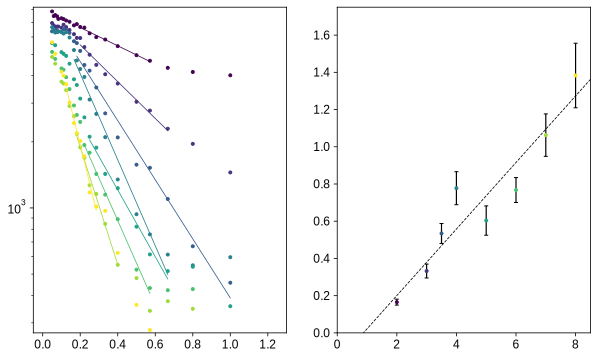

In [180]:
cs = plt.get_cmap('viridis')([i/(8-1) for i in range(8)])
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
for i in range(8):
    if i < 4:
        R = RxxLLm2low[:, i]
        T = Tvalslow
    else:
        R = RxxLLm2s[:, i-4]
        T = Tvalss
    ax[0].semilogy(1/T, R, '.', color=cs[i])
    x1 = np.linspace(xvals[i][0], xvals[i][-1], 10)
    ax[0].semilogy(x1, np.exp(num2slopes[i]*x1 + num2bs[i]), lw=0.8, color=cs[i])
    ax[1].plot(Bm2[i], num2gaps[i], '.', color=cs[i])
    
    
ax[1].errorbar(Bm2, num2gaps, yerr=np.array([num2gapconferrs_lower, num2gapconferrs_upper]), color='k', lw=0, elinewidth=1.2, capsize=2)
    
ax[0].axis([-0.05, 1.3, 2.7e2, 8.2e3])
ax[1].axis([0, 8.5, 0, 1.75])
modelbestfit = modelB*num2gapfitslope + num2gapfitb
ax[1].plot(modelB, modelbestfit, 'k--', lw=0.8)
# ax[1].plot(Bm1, result.best_fit, 'k--', lw=0.8)
# ax[1].fill_between(modelB, modelbestfit-modeldev, modelbestfit+modeldev, color='gray', alpha=0.2)

# nu = -4 (difficult to extract gap)

In [489]:
Tvals = np.array([0.025, 0.3, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 3, 5, 7, 10, 15, 20, 2.5, 3.5, 4, 4.5, 5.5, 6, 8, 9])
bvals = np.array([5, 6, 7, 8])
filtn = 1

gptsLLm4 = np.array([-1, -1.28, -1.52, -1.8])
indptsLLm4 = npd.val_to_index(gptsLLm4, data17.srframe_volt_p1_set[0, :])
RxxLLm4 = np.zeros((len(Tvals), 4))

for i in range(1):
    gind = indptsLLm4[i]
    RxxLLm4[:, i] = np.array((gaussian_filter(data17.lockin865_X[i, gind], filtn)/1e-9, 
                       gaussian_filter(data18.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data19.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data20.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data21.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data22.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data23.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data24.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data25.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data26.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data27.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data28.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data29.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data30.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data31.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data32.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data33.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data34.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data35.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data36.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data37.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data38.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data39.lockin865_X[i, gind], filtn)/1e-9))
for i in range(1,4):
    gind = indptsLLm4[i]
    RxxLLm4[:, i] = np.array((gaussian_filter(data17.lockin865_X[i, gind], filtn)/1e-9, 
                       gaussian_filter(data18.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data19.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data20.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data21.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data22.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data23.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data24.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data25.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data26.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data27.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data28.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data29.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data30.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data31.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data32.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data33.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data34.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data35.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data36.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data37.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data38.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data39.lockin865_X[i+1, gind], filtn)/1e-9))
    
Tvalslow = np.array([0.025, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 7, 8, 9, 10, 12, 13, 15, 17, 20])
bvalslow = np.array([2, 3, 3.5, 4])
gptsLLm4low = np.array([-0.24, -0.48, -0.6, -0.74])
indptsLLm4low = npd.val_to_index(gptsLLm4low, data40.srframe_volt_p1_set[0, :])
RxxLLm4low = np.zeros((len(Tvalslow), 4))
for i in range(4):
    gindlow = indptsLLm4low[i]
    RxxLLm4low[:, i] = np.array((gaussian_filter(data40.lockin865_X[i, gindlow], filtn)/1e-9, 
                       gaussian_filter(data41.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data42.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data43.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data44.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data45.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data46.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data47.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data48.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data49.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data50.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data51.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data52.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data53.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data54.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data55.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data56.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data57.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data58.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data59.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data60.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data61.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data62.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data63.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data64.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data65.lockin865_X[i, gindlow], filtn)/1e-9))   

In [490]:
plt.figure()
for i in range(4):
    plt.semilogy(1/Tvals, RxxLLm4[:, i], '.')
plt.xlabel('1/T')
plt.ylabel('Resistance')
plt.title( r'$\nu$ = -4   5-8T (difficult to extract anything)')

/Users/robertpolski/anaconda/envs/qcodes/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 1.0, '$\\nu$ = -4   5-8T (difficult to extract anything)')

In [491]:
plt.figure()
for i in range(4):
    plt.semilogy(1/Tvalslow, RxxLLm4low[:, i], '.')
plt.xlabel('1/T')
plt.ylabel('Resistance')
plt.title( r'$\nu$ = -4   2-4T (difficult to extract gap)')

/Users/robertpolski/anaconda/envs/qcodes/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 1.0, '$\\nu$ = -4   2-4T (difficult to extract gap)')

# nu = +2

## Data

In [64]:
Tvals = np.array([0.025, 0.3, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 3, 5, 7, 10, 15, 20, 2.5, 3.5, 4, 4.5, 5.5, 6, 8, 9])
bvals = np.array([5, 6, 7, 8])
filtn = 1

gptsLLp2 = np.array([1, 1.14, 1.26, 1.4])
indptsLLp2 = npd.val_to_index(gptsLLp2, data17.srframe_volt_p1_set[0, :])
RxxLLp2 = np.zeros((len(Tvals), 4))

for i in range(1):
    gind = indptsLLp2[i]
    RxxLLp2[:, i] = np.array((gaussian_filter(data17.lockin865_X[i, gind], filtn)/1e-9, 
                       gaussian_filter(data18.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data19.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data20.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data21.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data22.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data23.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data24.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data25.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data26.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data27.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data28.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data29.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data30.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data31.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data32.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data33.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data34.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data35.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data36.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data37.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data38.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data39.lockin865_X[i, gind], filtn)/1e-9))
for i in range(1,4):
    gind = indptsLLp2[i]
    RxxLLp2[:, i] = np.array((gaussian_filter(data17.lockin865_X[i, gind], filtn)/1e-9, 
                       gaussian_filter(data18.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data19.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data20.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data21.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data22.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data23.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data24.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data25.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data26.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data27.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data28.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data29.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data30.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data31.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data32.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data33.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data34.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data35.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data36.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data37.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data38.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data39.lockin865_X[i+1, gind], filtn)/1e-9))
    
    
Tvalslow = np.array([0.025, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 7, 8, 9, 10, 12, 13, 15, 17, 20])
bvalslow = np.array([2, 3, 3.5, 4])
gptsLLp2low = np.array([0.7, 0.74, 0.8, 0.86])
indptsLLp2low = npd.val_to_index(gptsLLp2low, data40.srframe_volt_p1_set[0, :])
RxxLLp2low = np.zeros((len(Tvalslow), 4))
for i in range(4):
    gindlow = indptsLLp2low[i]
    RxxLLp2low[:, i] = np.array((gaussian_filter(data40.lockin865_X[i, gindlow], filtn)/1e-9, 
                       gaussian_filter(data41.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data42.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data43.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data44.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data45.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data46.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data47.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data48.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data49.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data50.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data51.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data52.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data53.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data54.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data55.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data56.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data57.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data58.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data59.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data60.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data61.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data62.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data63.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data64.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data65.lockin865_X[i, gindlow], filtn)/1e-9)) 

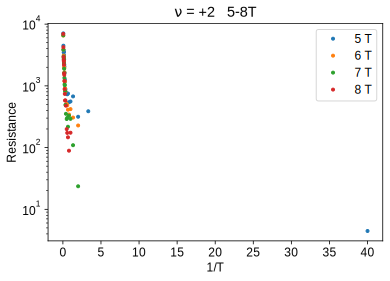

In [65]:
plt.figure()
for i in range(4):
    plt.semilogy(1/Tvals, RxxLLp2[:, i], '.', label='{} T'.format(i+5))
plt.xlabel('1/T')
plt.ylabel('Resistance')
plt.title( r'$\nu$ = +2   5-8T')
plt.legend()

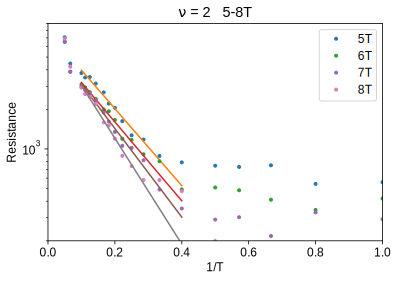

In [66]:
n1, n2 = 9, 12
n3, n4 = 16, 21
mp25, bp25 = np.polyfit(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.log(np.concatenate((RxxLLp2[n1:n2,0], RxxLLp2[n3:n4,0]))), 1)

plt.figure()
plt.semilogy(1/Tvals, RxxLLp2[:, 0], '.', label='5T')
#plt.semilogy(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.concatenate((RxxLLp2[n1:n2,0], RxxLLp2[n3:n4,0])), '.r')
x = np.linspace(0.1, 0.4, 100)
plt.semilogy(x, np.exp(mp25*x + bp25))


n1, n2 = 10, 12
n3, n4 = 16, 23
mp26, bp26 = np.polyfit(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.log(np.concatenate((RxxLLp2[n1:n2,1], RxxLLp2[n3:n4,1]))), 1)


plt.semilogy(1/Tvals, RxxLLp2[:, 1], '.', label='6T')
#plt.semilogy(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.concatenate((RxxLLp2[n1:n2,1], RxxLLp2[n3:n4,1])), '.r')
x = np.linspace(0.1, 0.4, 100)
plt.semilogy(x, np.exp(mp26*x + bp26))


n1, n2 = 9, 12
n3, n4 = 16, 23
mp27, bp27 = np.polyfit(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.log(np.concatenate((RxxLLp2[n1:n2,2], RxxLLp2[n3:n4,2]))), 1)


plt.semilogy(1/Tvals, RxxLLp2[:, 2], '.', label='7T')
#plt.semilogy(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.concatenate((RxxLLp2[n1:n2,2], RxxLLp2[n3:n4,2])), '.r')
x = np.linspace(0.1, 0.4, 100)
plt.semilogy(x, np.exp(mp27*x + bp27))


n1, n2 = 10, 12
n3, n4 = 16, 23
mp28, bp28 = np.polyfit(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.log(np.concatenate((RxxLLp2[n1:n2,3], RxxLLp2[n3:n4,3]))), 1)


plt.semilogy(1/Tvals, RxxLLp2[:, 3], '.', label='8T')
#plt.semilogy(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.concatenate((RxxLLp2[n1:n2,3], RxxLLp2[n3:n4,3])), '.r')
x = np.linspace(0.1, 0.4, 100)
plt.semilogy(x, np.exp(mp28*x + bp28))





plt.axis([0, 1, 200, 9000])
plt.xlabel('1/T')
plt.ylabel('Resistance')
plt.title( r'$\nu$ = 2   5-8T')

plt.legend()

Text(0.5, 1.0, '$\\nu$ = +2   2-4T')

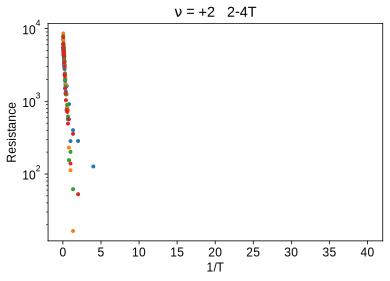

In [67]:
  plt.figure()
for i in range(4):
    plt.semilogy(1/Tvalslow, RxxLLp2low[:, i], '.')
plt.xlabel('1/T')
plt.ylabel('Resistance')
plt.title( r'$\nu$ = +2   2-4T')

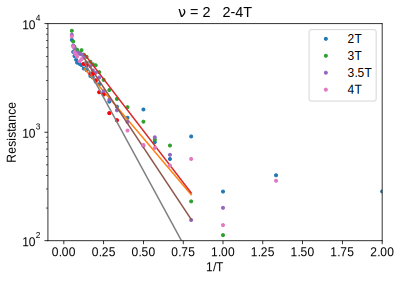

In [68]:
n1, n2 = 9, 19
mp22, bp22 = np.polyfit(1/Tvalslow[n1:n2], np.log(RxxLLp2low[n1:n2, 0]), 1)

plt.figure()
plt.semilogy(1/Tvalslow, RxxLLp2low[:,0], '.', label='2T')
#plt.semilogy(1/Tvalslow[n1:n2], RxxLLp2low[n1:n2, 0], '.r')
x = np.linspace(0.13, 0.8, 100)
plt.semilogy(x, np.exp(mp22*x + bp22))

n1, n2 = 9, 19
mp23, bp23 = np.polyfit(1/Tvalslow[n1:n2], np.log(RxxLLp2low[n1:n2, 1]), 1)


plt.semilogy(1/Tvalslow, RxxLLp2low[:,1], '.', label='3T')
#plt.semilogy(1/Tvalslow[n1:n2], RxxLLp2low[n1:n2, 1], '.r')
x = np.linspace(0.13, 0.8, 100)
plt.semilogy(x, np.exp(mp23*x + bp23))


n1, n2 = 8, 19
mp23p5, bp23p5 = np.polyfit(1/Tvalslow[n1:n2], np.log(RxxLLp2low[n1:n2, 2]), 1)


plt.semilogy(1/Tvalslow, RxxLLp2low[:,2], '.', label='3.5T')
#plt.semilogy(1/Tvalslow[n1:n2], RxxLLp2low[n1:n2, 2], '.r')
x = np.linspace(0.13, 0.8, 100)
plt.semilogy(x, np.exp(mp23p5*x + bp23p5))


n1, n2 = 10, 19
mp24, bp24 = np.polyfit(1/Tvalslow[n1:n2], np.log(RxxLLp2low[n1:n2, 3]), 1)


plt.semilogy(1/Tvalslow, RxxLLp2low[:,3], '.', label='4T')
plt.semilogy(1/Tvalslow[n1:n2], RxxLLp2low[n1:n2, 3], '.r')
x = np.linspace(0.13, 0.8, 100)
plt.semilogy(x, np.exp(mp24*x + bp24))



plt.axis([-0.1, 2, 100, 10000])
plt.xlabel('1/T')
plt.ylabel('Resistance')
plt.title( r'$\nu$ = 2   2-4T')

plt.legend()

Text(0.5, 1.0, '$\\nu$ = 2  gap')

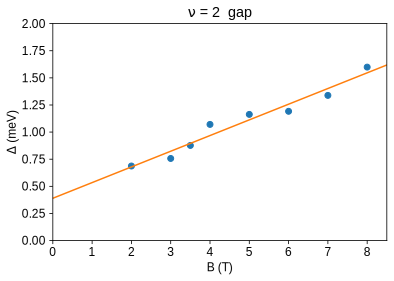

In [69]:
plt.figure()
plt.plot([2, 3, 3.5, 4, 5, 6, 7, 8], np.array([mp22, mp23, mp23p5, mp24, mp25, mp26, mp27, mp28])*-1.381e-23/1.602e-19*2*1000, 'o')
plt.axis([0, 8.5, 0, 2])
mp2, bp2 = np.polyfit([2, 3, 3.5, 4, 5, 6, 7, 8], np.array([mp22, mp23, mp23p5, mp24, mp25, mp26, mp27, mp28])*-1.381e-23/1.602e-19*2*1000, 1)
x = np.linspace(0, 8.5, 100)
plt.plot(x, mp2*x + bp2)
plt.xlabel('B (T)')
plt.ylabel('$\Delta$ (meV)')
plt.title( r'$\nu$ = 2  gap')

## Data Compiling, statistics, and plotting

In [181]:
Tvals # needs some recompiling

array([ 0.025,  0.3  ,  0.5  ,  0.75 ,  1.   ,  1.25 ,  1.5  ,  1.75 ,
        2.   ,  3.   ,  5.   ,  7.   , 10.   , 15.   , 20.   ,  2.5  ,
        3.5  ,  4.   ,  4.5  ,  5.5  ,  6.   ,  8.   ,  9.   ])

In [182]:
Tmap = np.argsort(Tvals)
Tvalss = np.sort(Tvals)
RxxLLp2s = RxxLLp2[Tmap, :]

In [183]:
Bp2 = Bm1

#low fields
n1 = [9, 9, 8, 10]
n2 = [19, 19, 19, 19]
xvals = []
yvals = []
for i in range(4):
    xvals.append(1/Tvalslow[n1[i]:n2[i]])
    yvals.append(np.log(RxxLLp2low[n1[i]:n2[i], i]))

#high fields
n1 = [10, 11, 10, 11]
n2 = [18, 20, 20, 20]
for i in range(4):
    xvals.append(1/Tvalss[n1[i]:n2[i]])
    yvals.append(np.log(RxxLLp2s[n1[i]:n2[i], i]))

In [184]:
Tfit = LinearModel()
nup2slopes = np.zeros(len(Bm2))
nup2bs = np.zeros(len(Bm2))
nup2stderrs = np.zeros(len(Bm2))
nup2conferrs_upper = np.zeros(len(Bm2))
nup2conferrs_lower = np.zeros(len(Bm2))
modeldevfields = []
for i in range(len(Bm2)):
    result = Tfit.fit(yvals[i], slope=-1, intercept=10, x=xvals[i])
    nup2slopes[i] = result.params['slope'].value
    nup2stderrs[i] = result.params['slope'].stderr
    nup2bs[i] = result.params['intercept'].value
    modeldevfields.append(result.eval_uncertainty(xvals[i]))
    cislope = result.conf_interval()['slope']
    nup2conferrs_upper[i] = cislope[1][1] - result.params['slope'].value
    nup2conferrs_lower[i] = -1*(cislope[5][1] - result.params['slope'].value)
    
nup2gaps = nup2slopes*-1.381e-23/1.602e-19*2*1000
nup2gaperrs = nup2stderrs*-1.381e-23/1.602e-19*2*1000
nup2gapconferrs_upper = nup2conferrs_upper*-1.381e-23/1.602e-19*2*1000
nup2gapconferrs_lower = nup2conferrs_lower*-1.381e-23/1.602e-19*2*1000

result = Tfit.fit(nup2gaps, slope=0.05, intercept=0, x=Bp2)
nup2gapfitslope = result.params['slope'].value
nup2gapfitb = result.params['intercept'].value
nup2gapfitstderr = result.params['slope'].stderr
modelB = np.linspace(0, 8.5, 20)
modeldev = result.eval_uncertainty(x=modelB, sigma=2)
ci = result.conf_interval()['slope']
nup2slopeconferr_upper = ci[5][1] - nup2gapfitslope
nup2slopeconferr_lower = nup2gapfitslope - ci[1][1]
print(result.ci_report())

              99.73%    95.45%    68.27%    _BEST_    68.27%    95.45%    99.73%
 slope    :  -0.06234  -0.03199  -0.01386   0.14457  +0.01386  +0.03199  +0.06234
 intercept:  -0.32337  -0.16594  -0.07191   0.38979  +0.07192  +0.16594  +0.32337


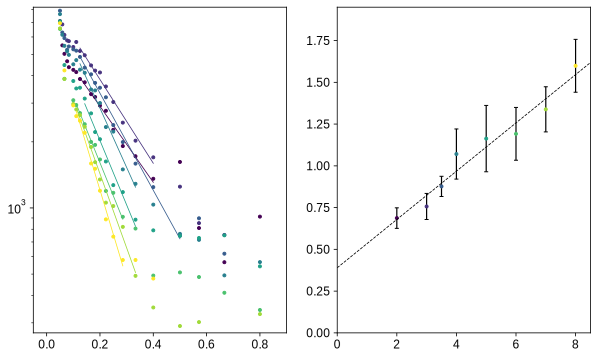

In [185]:
cs = plt.get_cmap('viridis')([i/(8-1) for i in range(8)])
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
for i in range(8):
    if i < 4:
        R = RxxLLp2low[:, i]
        T = Tvalslow
    else:
        R = RxxLLp2s[:, i-4]
        T = Tvalss
    ax[0].semilogy(1/T, R, '.', color=cs[i])
    x1 = np.linspace(xvals[i][0], xvals[i][-1], 10)
    ax[0].semilogy(x1, np.exp(nup2slopes[i]*x1 + nup2bs[i]), lw=0.8, color=cs[i])
    ax[1].plot(Bp2[i], nup2gaps[i], '.', color=cs[i])
    
    
ax[1].errorbar(Bp2, nup2gaps, yerr=np.array([nup2gapconferrs_lower, nup2gapconferrs_upper]), color='k', lw=0, elinewidth=1.2, capsize=2)
    
ax[0].axis([-0.05, 0.9, 2.7e2, 8.2e3])
ax[1].axis([0, 8.5, 0, 1.95])
modelbestfit = modelB*nup2gapfitslope + nup2gapfitb
ax[1].plot(modelB, modelbestfit, 'k--', lw=0.8)
# ax[1].plot(Bm1, result.best_fit, 'k--', lw=0.8)
# ax[1].fill_between(modelB, modelbestfit-modeldev, modelbestfit+modeldev, color='gray', alpha=0.2)

# nu = +4 (seem not accurate)

In [46]:
Tvals = np.array([0.025, 0.3, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 3, 5, 7, 10, 15, 20, 2.5, 3.5, 4, 4.5, 5.5, 6, 8, 9])
bvals = np.array([5, 6, 7, 8])
filtn = 1

gptsLLp4 = np.array([1.7, 1.96, 2.22, 2.48])
indptsLLp4 = npd.val_to_index(gptsLLp4, data17.srframe_volt_p1_set[0, :])
RxxLLp4 = np.zeros((len(Tvals), 4))

for i in range(1):
    gind = indptsLLp4[i]
    RxxLLp4[:, i] = np.array((gaussian_filter(data17.lockin865_X[i, gind], filtn)/1e-9, 
                       gaussian_filter(data18.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data19.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data20.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data21.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data22.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data23.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data24.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data25.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data26.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data27.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data28.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data29.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data30.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data31.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data32.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data33.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data34.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data35.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data36.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data37.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data38.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data39.lockin865_X[i, gind], filtn)/1e-9))
for i in range(1,4):
    gind = indptsLLp4[i]
    RxxLLp4[:, i] = np.array((gaussian_filter(data17.lockin865_X[i, gind], filtn)/1e-9, 
                       gaussian_filter(data18.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data19.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data20.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data21.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data22.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data23.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data24.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data25.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data26.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data27.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data28.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data29.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data30.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data31.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data32.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data33.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data34.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data35.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data36.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data37.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data38.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data39.lockin865_X[i+1, gind], filtn)/1e-9))
    
    
Tvalslow = np.array([0.025, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 7, 8, 9, 10, 12, 13, 15, 17, 20])
bvalslow = np.array([2, 3, 3.5, 4])
gptsLLp4low = np.array([0.88, 1.14, 1.30, 1.44])
indptsLLp4low = npd.val_to_index(gptsLLp4low, data40.srframe_volt_p1_set[0, :])
RxxLLp4low = np.zeros((len(Tvalslow), 4))
for i in range(4):
    gindlow = indptsLLp4low[i]
    RxxLLp4low[:, i] = np.array((gaussian_filter(data40.lockin865_X[i, gindlow], filtn)/1e-9, 
                       gaussian_filter(data41.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data42.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data43.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data44.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data45.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data46.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data47.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data48.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data49.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data50.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data51.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data52.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data53.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data54.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data55.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data56.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data57.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data58.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data59.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data60.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data61.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data62.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data63.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data64.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data65.lockin865_X[i, gindlow], filtn)/1e-9)) 

In [47]:
plt.figure()
for i in range(4):
    plt.semilogy(1/Tvals, RxxLLp4[:, i], '.')
plt.xlabel('1/T')
plt.ylabel('Resistance')
plt.title( r'$\nu$ = +4   5-8T')

/Users/robertpolski/anaconda/envs/qcodes/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 1.0, '$\\nu$ = +4   5-8T')

In [48]:
n1, n2 = 12, 15
n3, n4 = 21, 23
mp45, bp45 = np.polyfit(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.log(np.concatenate((RxxLLp4[n1:n2,0], RxxLLp4[n3:n4,0]))), 1)

plt.figure()
plt.semilogy(1/Tvals, RxxLLp4[:, 0], '.', label='5T')
#plt.semilogy(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.concatenate((RxxLLp4[n1:n2,0], RxxLLp4[n3:n4,0])), '.r')
x = np.linspace(0.02, 0.15, 100)
plt.semilogy(x, np.exp(mp45*x + bp45))


n1, n2 = 12, 15
n3, n4 = 21, 23
mp46, bp46 = np.polyfit(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.log(np.concatenate((RxxLLp4[n1:n2,1], RxxLLp4[n3:n4,1]))), 1)

plt.semilogy(1/Tvals, RxxLLp4[:, 1], '.', label='6T')
#plt.semilogy(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.concatenate((RxxLLp4[n1:n2,1], RxxLLp4[n3:n4,1])), '.r')
x = np.linspace(0.02, 0.15, 100)
plt.semilogy(x, np.exp(mp46*x + bp46))


n1, n2 = 12, 15
n3, n4 = 22, 23
mp47, bp47 = np.polyfit(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.log(np.concatenate((RxxLLp4[n1:n2,2], RxxLLp4[n3:n4,2]))), 1)

plt.semilogy(1/Tvals, RxxLLp4[:, 2], '.', label='7T')
#plt.semilogy(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.concatenate((RxxLLp4[n1:n2,2], RxxLLp4[n3:n4,2])), '.r')
x = np.linspace(0.02, 0.15, 100)
plt.semilogy(x, np.exp(mp47*x + bp47))


n1, n2 = 12, 15
n3, n4 = 22, 23
mp48, bp48 = np.polyfit(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.log(np.concatenate((RxxLLp4[n1:n2,3], RxxLLp4[n3:n4,3]))), 1)

plt.semilogy(1/Tvals, RxxLLp4[:, 3], '.', label='8T')
#plt.semilogy(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.concatenate((RxxLLp4[n1:n2,3], RxxLLp4[n3:n4,3])), '.r')
x = np.linspace(0.02, 0.15, 100)
plt.semilogy(x, np.exp(mp48*x + bp48))


plt.axis([0, 1, 100, 9000])
plt.xlabel('1/T')
plt.ylabel('Resistance')
plt.title( r'$\nu$ = 4  5-8T')

plt.legend()

/Users/robertpolski/anaconda/envs/qcodes/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [49]:
plt.figure()
for i in range(4):
    plt.semilogy(1/Tvalslow, RxxLLp4low[:, i], '.')
plt.xlabel('1/T')
plt.ylabel('Resistance')
plt.title( r'$\nu$ = +4   2-4T')

/Users/robertpolski/anaconda/envs/qcodes/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 1.0, '$\\nu$ = +4   2-4T')

In [50]:
n1, n2 = 22, 26
mp42, bp42 = np.polyfit(1/Tvalslow[n1:n2], np.log(RxxLLp4low[n1:n2, 0]), 1)

plt.figure()
plt.semilogy(1/Tvalslow, RxxLLp4low[:,0], '.', label='2T')
#plt.semilogy(1/Tvalslow[n1:n2], RxxLLp4low[n1:n2, 0], '.r')
x = np.linspace(0.04, 0.12, 100)
plt.semilogy(x, np.exp(mp42*x + bp42))



n1, n2 = 21, 26
mp43, bp43 = np.polyfit(1/Tvalslow[n1:n2], np.log(RxxLLp4low[n1:n2, 1]), 1)

plt.semilogy(1/Tvalslow, RxxLLp4low[:,1], '.', label='3T')
#plt.semilogy(1/Tvalslow[n1:n2], RxxLLp4low[n1:n2, 1], '.r')
x = np.linspace(0.04, 0.12, 100)
plt.semilogy(x, np.exp(mp43*x + bp43))


n1, n2 = 21, 26
mp43p5, bp43p5 = np.polyfit(1/Tvalslow[n1:n2], np.log(RxxLLp4low[n1:n2, 2]), 1)

plt.semilogy(1/Tvalslow, RxxLLp4low[:,2], '.', label='3.5T')
#plt.semilogy(1/Tvalslow[n1:n2], RxxLLp4low[n1:n2, 2], '.r')
x = np.linspace(0.04, 0.12, 100)
plt.semilogy(x, np.exp(mp43p5*x + bp43p5))


n1, n2 = 21, 26
mp44, bp44 = np.polyfit(1/Tvalslow[n1:n2], np.log(RxxLLp4low[n1:n2, 3]), 1)

plt.semilogy(1/Tvalslow, RxxLLp4low[:,3], '.', label='4T')
plt.semilogy(1/Tvalslow[n1:n2], RxxLLp4low[n1:n2, 3], '.r')
x = np.linspace(0.04, 0.12, 100)
plt.semilogy(x, np.exp(mp44*x + bp44))


plt.axis([0, 0.4, 500, 6000])
plt.xlabel('1/T')
plt.ylabel('Resistance')
plt.title( r'$\nu$ = 4   2-4T')

plt.legend()

/Users/robertpolski/anaconda/envs/qcodes/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [51]:
plt.figure()
plt.plot([2, 3, 3.5, 4, 5, 6, 7, 8], np.array([mp42, mp43, mp43p5, mp44, mp45, mp46, mp47, mp48])*-1.381e-23/1.602e-19*2*1000, 'o')
plt.ylim(0,7.5)
plt.xlim(0,8.5)
plt.xlabel('B (T)')
plt.ylabel('$\Delta$ (meV)')
plt.title( r'$\nu$ = 4  gap (seems not correct)')

/Users/robertpolski/anaconda/envs/qcodes/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 1.0, '$\\nu$ = 4  gap (seems not correct)')

# C = -3, -1 quarter 

## Data

In [77]:
Tvals = np.array([0.025, 0.3, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 3, 5, 7, 10, 15, 20, 2.5, 3.5, 4, 4.5, 5.5, 6, 8, 9])
bvals = np.array([5, 6, 7, 8])
filtn = 1

gptsCm3 = np.array([-2.58, -2.78, -2.98, -3.18])
indptsCm3 = npd.val_to_index(gptsCm3, data17.srframe_volt_p1_set[0, :])
RxxCm3 = np.zeros((len(Tvals), 4))

for i in range(1):
    gind = indptsCm3[i]
    RxxCm3[:, i] = np.array((gaussian_filter(data17.lockin865_X[i, gind], filtn)/1e-9, 
                       gaussian_filter(data18.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data19.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data20.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data21.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data22.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data23.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data24.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data25.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data26.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data27.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data28.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data29.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data30.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data31.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data32.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data33.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data34.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data35.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data36.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data37.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data38.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data39.lockin865_X[i, gind], filtn)/1e-9))
for i in range(1,4):
    gind = indptsCm3[i]
    RxxCm3[:, i] = np.array((gaussian_filter(data17.lockin865_X[i, gind], filtn)/1e-9, 
                       gaussian_filter(data18.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data19.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data20.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data21.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data22.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data23.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data24.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data25.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data26.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data27.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data28.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data29.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data30.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data31.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data32.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data33.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data34.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data35.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data36.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data37.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data38.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data39.lockin865_X[i+1, gind], filtn)/1e-9))

Text(0.5, 1.0, 'C = -3, -1 quarter 5-8T')

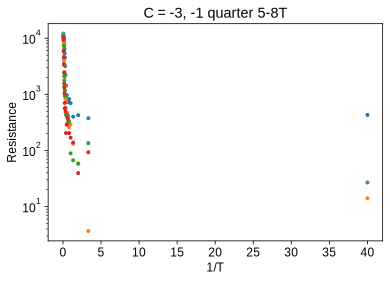

In [78]:
plt.figure()
for i in range(4):
    plt.semilogy(1/Tvals, RxxCm3[:, i], '.')
    plt.xlabel('1/T')
plt.ylabel('Resistance')
plt.title( 'C = -3, -1 quarter 5-8T')

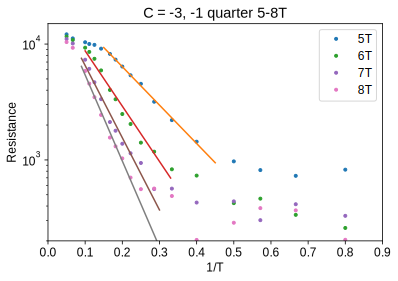

In [79]:
n1, n2 = 9, 11
n3, n4 = 15, 21
m_Cm3_5, b_Cm3_5 = np.polyfit(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.log(np.concatenate((RxxCm3[n1:n2,0], RxxCm3[n3:n4,0]))), 1)

plt.figure()
plt.semilogy(1/Tvals, RxxCm3[:, 0], '.', label='5T')
#plt.semilogy(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.concatenate((RxxCm3[n1:n2,0], RxxCm3[n3:n4,0])), '.r')
x = np.linspace(0.15, 0.45, 100)
plt.semilogy(x, np.exp(m_Cm3_5*x + b_Cm3_5))


n1, n2 = 9, 12
n3, n4 = 16, 23
m_Cm3_6, b_Cm3_6 = np.polyfit(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.log(np.concatenate((RxxCm3[n1:n2,1], RxxCm3[n3:n4,1]))), 1)

plt.semilogy(1/Tvals, RxxCm3[:, 1], '.', label='6T')
#plt.semilogy(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.concatenate((RxxCm3[n1:n2,1], RxxCm3[n3:n4,1])), '.r')
x = np.linspace(0.1, 0.33, 100)
plt.semilogy(x, np.exp(m_Cm3_6*x + b_Cm3_6))


n1, n2 = 10, 13
n3, n4 = 17, 23
m_Cm3_7, b_Cm3_7 = np.polyfit(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.log(np.concatenate((RxxCm3[n1:n2,2], RxxCm3[n3:n4,2]))), 1)

plt.semilogy(1/Tvals, RxxCm3[:, 2], '.', label='7T')
#plt.semilogy(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.concatenate((RxxCm3[n1:n2,2], RxxCm3[n3:n4,2])), '.r')
x = np.linspace(0.09, 0.3, 100)
plt.semilogy(x, np.exp(m_Cm3_7*x + b_Cm3_7))


n1, n2 = 10, 13
n3, n4 = 18, 23
m_Cm3_8, b_Cm3_8 = np.polyfit(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.log(np.concatenate((RxxCm3[n1:n2,3], RxxCm3[n3:n4,3]))), 1)

plt.semilogy(1/Tvals, RxxCm3[:, 3], '.', label='8T')
#plt.semilogy(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.concatenate((RxxCm3[n1:n2,3], RxxCm3[n3:n4,3])), '.r')
x = np.linspace(0.09, 0.3, 100)
plt.semilogy(x, np.exp(m_Cm3_8*x + b_Cm3_8))




plt.axis([0, 0.9, 200, 15000])
plt.xlabel('1/T')
plt.ylabel('Resistance')
plt.title( 'C = -3, -1 quarter 5-8T')

plt.legend()

Text(0.5, 1.0, 'C = -3, -1 quarter gap')

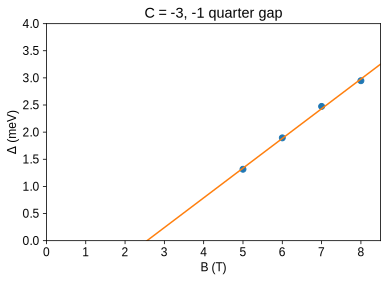

In [80]:

plt.figure()
plt.plot([5, 6, 7, 8], np.array([m_Cm3_5, m_Cm3_6, m_Cm3_7, m_Cm3_8])*-1.381e-23/1.602e-19*2*1000, 'o')
plt.axis([0, 8.5, 0, 4])
mC3, bC3 = np.polyfit([5, 6, 7, 8], np.array([m_Cm3_5, m_Cm3_6, m_Cm3_7, m_Cm3_8])*-1.381e-23/1.602e-19*2*1000, 1)
x = np.linspace(0, 8.5, 100)
plt.plot(x, mC3*x + bC3)
plt.xlabel('B (T)')
plt.ylabel('$\Delta$ (meV)')
plt.title( 'C = -3, -1 quarter gap')

## Data compiling, statistics, plotting

The main difference here is that it is just 5-8T

In [186]:
Tvals # needs some recompiling

array([ 0.025,  0.3  ,  0.5  ,  0.75 ,  1.   ,  1.25 ,  1.5  ,  1.75 ,
        2.   ,  3.   ,  5.   ,  7.   , 10.   , 15.   , 20.   ,  2.5  ,
        3.5  ,  4.   ,  4.5  ,  5.5  ,  6.   ,  8.   ,  9.   ])

In [187]:
Tmap = np.argsort(Tvals)
Tvalss = np.sort(Tvals)
RxxCm3s = RxxCm3[Tmap, :]

In [188]:
print(np.sort(np.concatenate((Tvals[10:13], Tvals[18:23]))))
print(Tvalss[13:21])

[ 4.5  5.   5.5  6.   7.   8.   9.  10. ]
[ 4.5  5.   5.5  6.   7.   8.   9.  10. ]


In [189]:
BCm3 = [5, 6, 7, 8]

#high fields
n1 = [9, 10, 12, 13]
n2 = [17, 20, 21, 21]
xvals = []
yvals = []
for i in range(4):
    xvals.append(1/Tvalss[n1[i]:n2[i]])
    yvals.append(np.log(RxxCm3s[n1[i]:n2[i], i]))

In [190]:
Tfit = LinearModel()
nuCm3slopes = np.zeros(len(BCm3))
nuCm3bs = np.zeros(len(BCm3))
nuCm3stderrs = np.zeros(len(BCm3))
nuCm3conferrs_upper = np.zeros(len(BCm3))
nuCm3conferrs_lower = np.zeros(len(BCm3))
modeldevfields = []
for i in range(len(BCm3)):
    result = Tfit.fit(yvals[i], slope=-1, intercept=10, x=xvals[i])
    nuCm3slopes[i] = result.params['slope'].value
    nuCm3stderrs[i] = result.params['slope'].stderr
    nuCm3bs[i] = result.params['intercept'].value
    modeldevfields.append(result.eval_uncertainty(xvals[i]))
    cislope = result.conf_interval()['slope']
    nuCm3conferrs_upper[i] = cislope[1][1] - result.params['slope'].value
    nuCm3conferrs_lower[i] = -1*(cislope[5][1] - result.params['slope'].value)
    
nuCm3gaps = nuCm3slopes*-1.381e-23/1.602e-19*2*1000
nuCm3gaperrs = nuCm3stderrs*-1.381e-23/1.602e-19*2*1000
nuCm3gapconferrs_upper = nuCm3conferrs_upper*-1.381e-23/1.602e-19*2*1000
nuCm3gapconferrs_lower = nuCm3conferrs_lower*-1.381e-23/1.602e-19*2*1000

result = Tfit.fit(nuCm3gaps, slope=0.05, intercept=0, x=BCm3)
nuCm3gapfitslope = result.params['slope'].value
nuCm3gapfitb = result.params['intercept'].value
nuCm3gapfitstderr = result.params['slope'].stderr
modelB = np.linspace(0, 8.5, 20)
modeldev = result.eval_uncertainty(x=modelB, sigma=2)
ci = result.conf_interval()['slope']
nuCm3slopeconferr_upper = ci[5][1] - nuCm3gapfitslope
nuCm3slopeconferr_lower = nuCm3gapfitslope - ci[1][1]
print(result.ci_report())

              99.73%    95.45%    68.27%    _BEST_    68.27%    95.45%    99.73%
 slope    :  -0.35109  -0.08274  -0.02416   0.54761  +0.02416  +0.08274  +0.35109
 intercept:  -2.31557  -0.54572  -0.15928  -1.40123  +0.15929  +0.54572  +2.31557


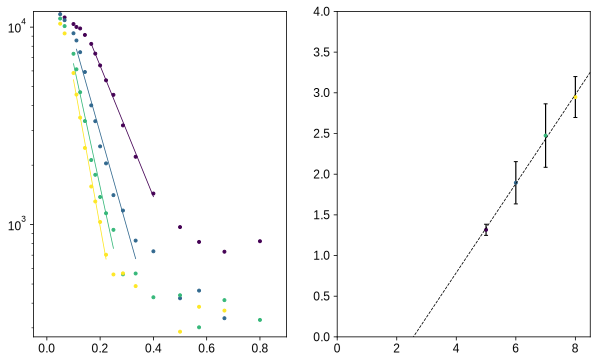

In [191]:
cs = plt.get_cmap('viridis')([i/(4-1) for i in range(4)])
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
for i in range(4):
    ax[0].semilogy(1/Tvalss, RxxCm3s[:, i], '.', color=cs[i])
    x1 = np.linspace(xvals[i][0], xvals[i][-1], 10)
    ax[0].semilogy(x1, np.exp(nuCm3slopes[i]*x1 + nuCm3bs[i]), lw=0.8, color=cs[i])
    ax[1].plot(BCm3[i], nuCm3gaps[i], '.', color=cs[i])
    
    
ax[1].errorbar(BCm3, nuCm3gaps, yerr=np.array([nuCm3gapconferrs_lower, nuCm3gapconferrs_upper]), color='k', lw=0, elinewidth=1.2, capsize=2)
    
ax[0].axis([-0.05, 0.9, 2.7e2, 1.2e4])
ax[1].axis([0, 8.5, 0, 4])
modelbestfit = modelB*nuCm3gapfitslope + nuCm3gapfitb
ax[1].plot(modelB, modelbestfit, 'k--', lw=0.8)
# ax[1].plot(Bm1, result.best_fit, 'k--', lw=0.8)
# ax[1].fill_between(modelB, modelbestfit-modeldev, modelbestfit+modeldev, color='gray', alpha=0.2)

# C = 3, 1 quarter 

## Data

In [88]:
Tvals = np.array([0.025, 0.3, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 3, 5, 7, 10, 15, 20, 2.5, 3.5, 4, 4.5, 5.5, 6, 8, 9])
bvals = np.array([5, 6, 7, 8])
filtn = 1

gptsC3 = np.array([3.28, 3.50, 3.68, 3.86])
indptsC3 = npd.val_to_index(gptsC3, data17.srframe_volt_p1_set[0, :])
RxxC3 = np.zeros((len(Tvals), 4))

for i in range(1):
    gind = indptsC3[i]
    RxxC3[:, i] = np.array((gaussian_filter(data17.lockin865_X[i, gind], filtn)/1e-9, 
                       gaussian_filter(data18.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data19.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data20.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data21.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data22.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data23.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data24.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data25.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data26.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data27.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data28.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data29.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data30.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data31.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data32.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data33.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data34.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data35.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data36.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data37.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data38.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data39.lockin865_X[i, gind], filtn)/1e-9))
for i in range(1,4):
    gind = indptsC3[i]
    RxxC3[:, i] = np.array((gaussian_filter(data17.lockin865_X[i, gind], filtn)/1e-9, 
                       gaussian_filter(data18.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data19.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data20.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data21.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data22.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data23.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data24.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data25.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data26.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data27.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data28.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data29.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data30.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data31.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data32.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data33.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data34.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data35.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data36.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data37.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data38.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data39.lockin865_X[i+1, gind], filtn)/1e-9))
    
    
    
Tvalslow = np.array([0.025, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 7, 8, 9, 10, 12, 13, 15, 17, 20])
bvalslow = np.array([2, 3, 3.5, 4])
gptsC3low = np.array([2.68, 2.86, 2.96, 3.06])
indptsC3low = npd.val_to_index(gptsC3low, data40.srframe_volt_p1_set[0, :])
RxxC3low = np.zeros((len(Tvalslow), 4))
for i in range(4):
    gindlow = indptsC3low[i]
    RxxC3low[:, i] = np.array((gaussian_filter(data40.lockin865_X[i, gindlow], filtn)/1e-9, 
                       gaussian_filter(data41.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data42.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data43.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data44.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data45.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data46.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data47.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data48.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data49.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data50.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data51.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data52.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data53.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data54.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data55.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data56.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data57.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data58.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data59.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data60.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data61.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data62.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data63.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data64.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data65.lockin865_X[i, gindlow], filtn)/1e-9))   

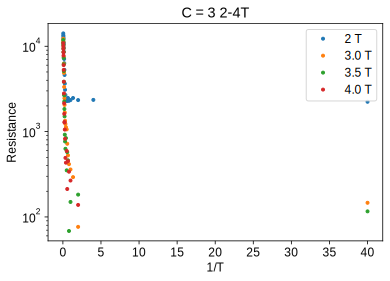

In [89]:
plt.figure()
for i in range(1):
    plt.semilogy(1/Tvalslow, RxxC3low[:, i], '.', label='2 T')
for i in range(1,4):
    plt.semilogy(1/Tvalslow, RxxC3low[:, i], '.', label='{} T'.format(i*0.5+2.5))
plt.xlabel('1/T')
plt.ylabel('Resistance')
plt.title( 'C = 3   2-4T')
plt.legend()

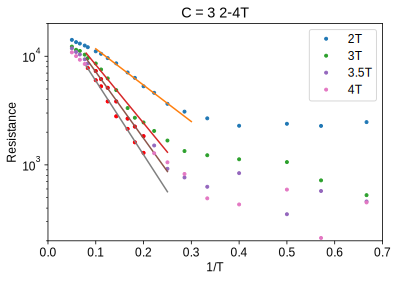

In [90]:
plt.figure()

n1, n2 = 12, 20
m_C3_2, b_C3_2 = np.polyfit(1/Tvalslow[n1:n2], np.log(RxxC3low[n1:n2, 0]), 1)


plt.semilogy(1/Tvalslow, RxxC3low[:,0], '.', label='2T')
#plt.semilogy(1/Tvalslow[n1:n2], RxxC3low[n1:n2, 0], '.r')
x = np.linspace(0.1, 0.3, 100)
plt.semilogy(x, np.exp(m_C3_2*x + b_C3_2))


n1, n2 = 13, 21
m_C3_3, b_C3_3 = np.polyfit(1/Tvalslow[n1:n2], np.log(RxxC3low[n1:n2, 1]), 1)


plt.semilogy(1/Tvalslow, RxxC3low[:,1], '.', label='3T')
#plt.semilogy(1/Tvalslow[n1:n2], RxxC3low[n1:n2, 1], '.r')
x = np.linspace(0.08, 0.25, 100)
plt.semilogy(x, np.exp(m_C3_3*x + b_C3_3))


n1, n2 = 14, 21
m_C3_3p5, b_C3_3p5 = np.polyfit(1/Tvalslow[n1:n2], np.log(RxxC3low[n1:n2, 2]), 1)


plt.semilogy(1/Tvalslow, RxxC3low[:,2], '.', label='3.5T')
plt.semilogy(1/Tvalslow[n1:n2], RxxC3low[n1:n2, 2], '.r')
x = np.linspace(0.08, 0.25, 100)
plt.semilogy(x, np.exp(m_C3_3p5*x + b_C3_3p5))


n1, n2 = 14, 22
m_C3_4, b_C3_4 = np.polyfit(1/Tvalslow[n1:n2], np.log(RxxC3low[n1:n2, 3]), 1)


plt.semilogy(1/Tvalslow, RxxC3low[:,3], '.', label='4T')
plt.semilogy(1/Tvalslow[n1:n2], RxxC3low[n1:n2, 3], '.r')
x = np.linspace(0.08, 0.25, 100)
plt.semilogy(x, np.exp(m_C3_4*x + b_C3_4))



plt.axis([0, 0.7, 200, 20000])
plt.xlabel('1/T')
plt.ylabel('Resistance')
plt.title( 'C = 3   2-4T')

plt.legend()

Text(0.5, 1.0, 'C = 3, 1 quarter, 5-8T')

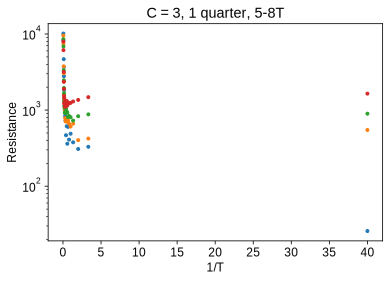

In [91]:
plt.figure()
for i in range(4):
    plt.semilogy(1/Tvals, RxxC3[:, i], '.')
    plt.xlabel('1/T')
plt.ylabel('Resistance')
plt.title( 'C = 3, 1 quarter, 5-8T')

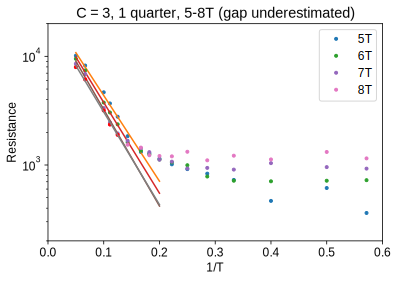

In [92]:
plt.figure()

n1, n2 = 11, 15
n3, n4 = 20, 23
m_C3_5, b_C3_5 = np.polyfit(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.log(np.concatenate((RxxC3[n1:n2,0], RxxC3[n3:n4,0]))), 1)

plt.semilogy(1/Tvals, RxxC3[:, 0], '.', label='5T')
#plt.semilogy(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.concatenate((RxxC3[n1:n2,0], RxxC3[n3:n4,0])), '.r')
x = np.linspace(0.05, 0.2, 100)
plt.semilogy(x, np.exp(m_C3_5*x + b_C3_5))


n1, n2 = 11, 15
n3, n4 = 21, 23
m_C3_6, b_C3_6 = np.polyfit(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.log(np.concatenate((RxxC3[n1:n2,1], RxxC3[n3:n4,1]))), 1)

plt.semilogy(1/Tvals, RxxC3[:, 1], '.', label='6T')
#plt.semilogy(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.concatenate((RxxC3[n1:n2,1], RxxC3[n3:n4,1])), '.r')
x = np.linspace(0.05, 0.2, 100)
plt.semilogy(x, np.exp(m_C3_6*x + b_C3_6))


n1, n2 = 12, 15
n3, n4 = 21, 23
m_C3_7, b_C3_7 = np.polyfit(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.log(np.concatenate((RxxC3[n1:n2,2], RxxC3[n3:n4,2]))), 1)

plt.semilogy(1/Tvals, RxxC3[:, 2], '.', label='7T')
#plt.semilogy(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.concatenate((RxxC3[n1:n2,2], RxxC3[n3:n4,2])), '.r')
x = np.linspace(0.05, 0.2, 100)
plt.semilogy(x, np.exp(m_C3_7*x + b_C3_7))


n1, n2 = 12, 15
n3, n4 = 21, 23
m_C3_8, b_C3_8 = np.polyfit(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.log(np.concatenate((RxxC3[n1:n2,3], RxxC3[n3:n4,3]))), 1)

plt.semilogy(1/Tvals, RxxC3[:, 3], '.', label='8T')
plt.semilogy(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.concatenate((RxxC3[n1:n2,3], RxxC3[n3:n4,3])), '.r')
x = np.linspace(0.05, 0.2, 100)
plt.semilogy(x, np.exp(m_C3_8*x + b_C3_8))




plt.axis([0, 0.6, 200, 20000])
plt.xlabel('1/T')
plt.ylabel('Resistance')
plt.title( 'C = 3, 1 quarter, 5-8T (gap underestimated)')

plt.legend()

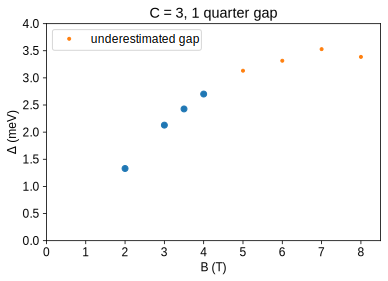

In [93]:

plt.figure()
plt.plot([2, 3, 3.5, 4], np.array([m_C3_2, m_C3_3, m_C3_3p5, m_C3_4])*-1.381e-23/1.602e-19*2*1000, 'o')
plt.plot([5, 6, 7, 8], np.array([m_C3_5, m_C3_6, m_C3_7, m_C3_8])*-1.381e-23/1.602e-19*2*1000, '.', label = 'underestimated gap')
plt.axis([0, 8.5, 0, 4])
plt.xlabel('B (T)')
plt.ylabel('$\Delta$ (meV)')
plt.title( 'C = 3, 1 quarter gap')
plt.legend()

## Data compiling, statistics, and plots

In [192]:
Tvals # needs some recompiling

array([ 0.025,  0.3  ,  0.5  ,  0.75 ,  1.   ,  1.25 ,  1.5  ,  1.75 ,
        2.   ,  3.   ,  5.   ,  7.   , 10.   , 15.   , 20.   ,  2.5  ,
        3.5  ,  4.   ,  4.5  ,  5.5  ,  6.   ,  8.   ,  9.   ])

In [193]:
Tmap = np.argsort(Tvals)
Tvalss = np.sort(Tvals)
RxxCp3s = RxxC3[Tmap, :]

In [194]:
print(np.sort(np.concatenate((Tvals[12:15], Tvals[21:23]))))
print(Tvalss[18:23])

[ 8.  9. 10. 15. 20.]
[ 8.  9. 10. 15. 20.]


In [195]:
BCp3 = Bm1

#low fields
n1 = [12, 13, 14, 14]
n2 = [20, 21, 21, 22]
xvals = []
yvals = []
for i in range(4):
    xvals.append(1/Tvalslow[n1[i]:n2[i]])
    yvals.append(np.log(RxxC3low[n1[i]:n2[i], i]))

#high fields
n1 = [16, 17, 18, 18]
n2 = [23, 23, 23, 23]
for i in range(4):
    xvals.append(1/Tvalss[n1[i]:n2[i]])
    yvals.append(np.log(RxxCp3s[n1[i]:n2[i], i]))

In [196]:
Tfit = LinearModel()
nuCp3slopes = np.zeros(len(BCp3))
nuCp3bs = np.zeros(len(BCp3))
nuCp3stderrs = np.zeros(len(BCp3))
nuCp3conferrs_upper = np.zeros(len(BCp3))
nuCp3conferrs_lower = np.zeros(len(BCp3))
modeldevfields = []
for i in range(len(BCp3)):
    result = Tfit.fit(yvals[i], slope=-1, intercept=10, x=xvals[i])
    nuCp3slopes[i] = result.params['slope'].value
    nuCp3stderrs[i] = result.params['slope'].stderr
    nuCp3bs[i] = result.params['intercept'].value
    modeldevfields.append(result.eval_uncertainty(xvals[i]))
    cislope = result.conf_interval()['slope']
    nuCp3conferrs_upper[i] = cislope[1][1] - result.params['slope'].value
    nuCp3conferrs_lower[i] = -1*(cislope[5][1] - result.params['slope'].value)
    
nuCp3gaps = nuCp3slopes*-1.381e-23/1.602e-19*2*1000
nuCp3gaperrs = nuCp3stderrs*-1.381e-23/1.602e-19*2*1000
nuCp3gapconferrs_upper = nuCp3conferrs_upper*-1.381e-23/1.602e-19*2*1000
nuCp3gapconferrs_lower = nuCp3conferrs_lower*-1.381e-23/1.602e-19*2*1000

result = Tfit.fit(nuCp3gaps[:4], slope=0.05, intercept=0, x=BCp3[:4])
nuCp3gapfitslope = result.params['slope'].value
nuCp3gapfitb = result.params['intercept'].value
nuCp3gapfitstderr = result.params['slope'].stderr
modelB = np.linspace(0, 8.5, 20)
modeldev = result.eval_uncertainty(x=modelB, sigma=2)
ci = result.conf_interval()['slope']
nuCp3slopeconferr_upper = ci[5][1] - nuCp3gapfitslope
nuCp3slopeconferr_lower = nuCp3gapfitslope - ci[1][1]
print(result.ci_report())

/Users/robertpolski/anaconda/envs/qcodes/lib/python3.7/site-packages/lmfit/confidence.py:319: UserWarning: maxiter=200 reached and prob(intercept=-0.5620508578755345) = 0.9348863695859356 < max(sigmas).
  warn(errmsg)


              99.73%    95.45%    68.27%    _BEST_    68.27%    95.45%    99.73%
 slope    :  -0.88057  -0.20753  -0.06057   0.69147  +0.06059  +0.20753  +0.88057
 intercept:      -inf      -inf  -0.19453  -0.01364  +0.19453      +inf      +inf


/Users/robertpolski/anaconda/envs/qcodes/lib/python3.7/site-packages/lmfit/confidence.py:319: UserWarning: maxiter=200 reached and prob(intercept=0.5347668356485669) = 0.934886351286617 < max(sigmas).
  warn(errmsg)


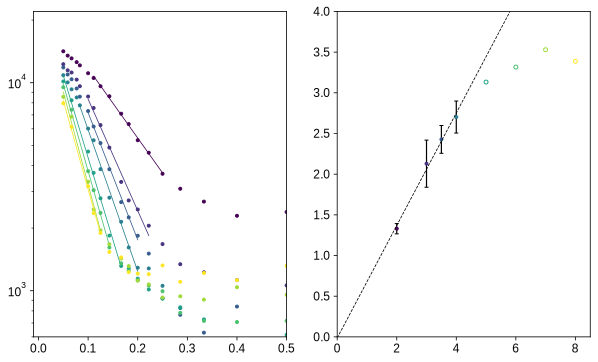

In [197]:
cs = plt.get_cmap('viridis')([i/(8-1) for i in range(8)])
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
for i in range(8):
    if i < 4:
        T = Tvalslow
        R = RxxC3low[:, i]
    else:
        T = Tvalss
        R = RxxCp3s[:, i-4]
    ax[0].semilogy(1/T, R, '.', color=cs[i])
    x1 = np.linspace(xvals[i][0], xvals[i][-1], 10)
    ax[0].semilogy(x1, np.exp(nuCp3slopes[i]*x1 + nuCp3bs[i]), lw=0.8, color=cs[i])
    if i < 4:
        ax[1].plot(BCp3[i], nuCp3gaps[i], '.', color=cs[i])
        ax[1].errorbar(BCp3[i], nuCp3gaps[i], yerr=np.array([[nuCp3gapconferrs_lower[i], nuCp3gapconferrs_upper[i]]]).T, color='k', lw=0, elinewidth=1.2, capsize=2)
    else:
        ax[1].plot(BCp3[i], nuCp3gaps[i], 'o', color=cs[i], ms=4, fillstyle='none')
        
    
ax[0].axis([-0.01, 0.5, 6e2, 2.2e4])
ax[1].axis([0, 8.5, 0, 4])
modelbestfit = modelB*nuCp3gapfitslope + nuCp3gapfitb
ax[1].plot(modelB, modelbestfit, 'k--', lw=0.8)
# ax[1].plot(Bm1, result.best_fit, 'k--', lw=0.8)
# ax[1].fill_between(modelB, modelbestfit-modeldev, modelbestfit+modeldev, color='gray', alpha=0.2)

# C =2 +half filling

## Data

In [101]:
Tvals = np.array([0.025, 0.3, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 3, 5, 7, 10, 15, 20, 2.5, 3.5, 4, 4.5, 5.5, 6, 8, 9])
bvals = np.array([5, 6, 7, 8])
filtn = 1

gptsC2 = np.array([4.82, 5, 5.12, 5.24])
indptsC2 = npd.val_to_index(gptsC2, data17.srframe_volt_p1_set[0, :])
RxxC2 = np.zeros((len(Tvals), 4))

for i in range(1):
    gind = indptsC2[i]
    RxxC2[:, i] = np.array((gaussian_filter(data17.lockin865_X[i, gind], filtn)/1e-9, 
                       gaussian_filter(data18.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data19.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data20.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data21.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data22.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data23.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data24.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data25.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data26.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data27.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data28.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data29.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data30.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data31.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data32.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data33.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data34.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data35.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data36.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data37.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data38.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data39.lockin865_X[i, gind], filtn)/1e-9))
for i in range(1,4):
    gind = indptsC2[i]
    RxxC2[:, i] = np.array((gaussian_filter(data17.lockin865_X[i, gind], filtn)/1e-9, 
                       gaussian_filter(data18.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data19.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data20.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data21.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data22.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data23.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data24.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data25.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data26.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data27.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data28.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data29.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data30.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data31.lockin865_X[i, gind], filtn)/1e-9,
                       gaussian_filter(data32.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data33.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data34.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data35.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data36.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data37.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data38.lockin865_X[i+1, gind], filtn)/1e-9,
                       gaussian_filter(data39.lockin865_X[i+1, gind], filtn)/1e-9))
    
    
    
Tvalslow = np.array([0.025, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 7, 8, 9, 10, 12, 13, 15, 17, 20])
bvalslow = np.array([2, 3, 3.5, 4])
gptsC2low = np.array([4.44, 4.58, 4.64, 4.7])
indptsC2low = npd.val_to_index(gptsC2low, data40.srframe_volt_p1_set[0, :])
RxxC2low = np.zeros((len(Tvalslow), 4))
for i in range(4):
    gindlow = indptsC2low[i]
    RxxC2low[:, i] = np.array((gaussian_filter(data40.lockin865_X[i, gindlow], filtn)/1e-9, 
                       gaussian_filter(data41.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data42.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data43.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data44.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data45.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data46.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data47.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data48.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data49.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data50.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data51.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data52.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data53.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data54.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data55.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data56.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data57.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data58.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data59.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data60.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data61.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data62.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data63.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data64.lockin865_X[i, gindlow], filtn)/1e-9,
                       gaussian_filter(data65.lockin865_X[i, gindlow], filtn)/1e-9))   

Text(0.5, 1.0, 'C = 2 5-8T')

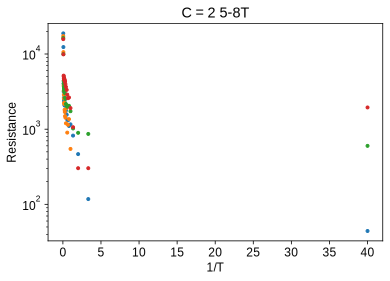

In [102]:
plt.figure()
for i in range(4):
    plt.semilogy(1/Tvals, RxxC2[:, i], '.' , label='{} T'.format(i+5))
    plt.xlabel('1/T')
plt.ylabel('Resistance')
plt.title( 'C = 2 5-8T')

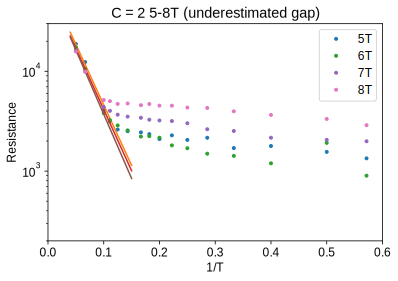

In [103]:
plt.figure()

n1, n2 = 12, 15
n3, n4 = 21, 23
m_C2_5, b_C2_5 = np.polyfit(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.log(np.concatenate((RxxC2[n1:n2,0], RxxC2[n3:n4,0]))), 1)

plt.semilogy(1/Tvals, RxxC2[:, 0], '.', label='5T')
#plt.semilogy(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.concatenate((RxxC2[n1:n2,0], RxxC2[n3:n4,0])), '.r')
x = np.linspace(0.04, 0.15, 100)
plt.semilogy(x, np.exp(m_C2_5*x + b_C2_5))


n1, n2 = 12, 15
n3, n4 = 22, 23
m_C2_6, b_C2_6 = np.polyfit(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.log(np.concatenate((RxxC2[n1:n2,1], RxxC2[n3:n4,1]))), 1)

plt.semilogy(1/Tvals, RxxC2[:, 1], '.', label='6T')
#plt.semilogy(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.concatenate((RxxC2[n1:n2,1], RxxC2[n3:n4,1])), '.r')
x = np.linspace(0.04, 0.15, 100)
plt.semilogy(x, np.exp(m_C2_6*x + b_C2_6))


n1, n2 = 13, 15
n3, n4 = 23, 23
m_C2_7, b_C2_7 = np.polyfit(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.log(np.concatenate((RxxC2[n1:n2,2], RxxC2[n3:n4,2]))), 1)

plt.semilogy(1/Tvals, RxxC2[:, 2], '.', label='7T')
#plt.semilogy(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.concatenate((RxxC2[n1:n2,2], RxxC2[n3:n4,2])), '.r')
x = np.linspace(0.04, 0.15, 100)
plt.semilogy(x, np.exp(m_C2_7*x + b_C2_7))


n1, n2 = 13, 15
n3, n4 = 23, 23
m_C2_8, b_C2_8 = np.polyfit(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.log(np.concatenate((RxxC2[n1:n2,3], RxxC2[n3:n4,3]))), 1)

plt.semilogy(1/Tvals, RxxC2[:, 3], '.', label='8T')
#plt.semilogy(1/np.concatenate((Tvals[n1:n2],Tvals[n3:n4])), np.concatenate((RxxC2[n1:n2,3], RxxC2[n3:n4,3])), '.r')
x = np.linspace(0.04, 0.15, 100)
#plt.semilogy(x, np.exp(m_C2_8*x + b_C2_8))



plt.axis([0, 0.6, 200, 30000])
plt.xlabel('1/T')
plt.ylabel('Resistance')
plt.title( r'C = 2 5-8T (underestimated gap)')

plt.legend()

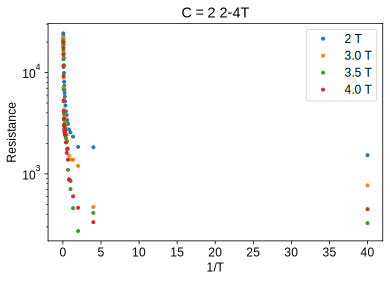

In [104]:
plt.figure()
for i in range(1):
    plt.semilogy(1/Tvalslow, RxxC2low[:, i], '.', label='2 T')
for i in range(1,4):
    plt.semilogy(1/Tvalslow, RxxC2low[:, i], '.', label='{} T'.format(i*0.5+2.5))
plt.xlabel('1/T')
plt.ylabel('Resistance')
plt.title( 'C = 2   2-4T')
plt.legend()

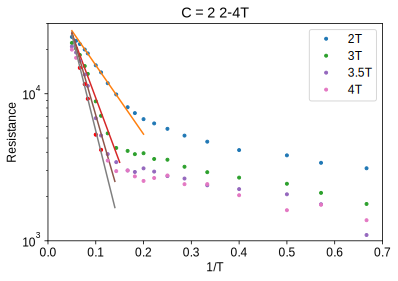

In [105]:
plt.figure()

n1, n2 = 17, 23
m_C2_2, b_C2_2 = np.polyfit(1/Tvalslow[n1:n2], np.log(RxxC2low[n1:n2, 0]), 1)


plt.semilogy(1/Tvalslow, RxxC2low[:,0], '.', label='2T')
#plt.semilogy(1/Tvalslow[n1:n2], RxxC2low[n1:n2, 0], '.r')
x = np.linspace(0.05, 0.2, 100)
plt.semilogy(x, np.exp(m_C2_2*x + b_C2_2))


n1, n2 = 17, 24
m_C2_3, b_C2_3 = np.polyfit(1/Tvalslow[n1:n2], np.log(RxxC2low[n1:n2, 1]), 1)


plt.semilogy(1/Tvalslow, RxxC2low[:,1], '.', label='3T')
#plt.semilogy(1/Tvalslow[n1:n2], RxxC2low[n1:n2, 1], '.r')
x = np.linspace(0.05, 0.15, 100)
plt.semilogy(x, np.exp(m_C2_3*x + b_C2_3))


n1, n2 = 18, 24
m_C2_3p5, b_C2_3p5 = np.polyfit(1/Tvalslow[n1:n2], np.log(RxxC2low[n1:n2, 2]), 1)


plt.semilogy(1/Tvalslow, RxxC2low[:,2], '.', label='3.5T')
#plt.semilogy(1/Tvalslow[n1:n2], RxxC2low[n1:n2, 2], '.r')
x = np.linspace(0.05, 0.14, 100)
plt.semilogy(x, np.exp(m_C2_3p5*x + b_C2_3p5))


n1, n2 = 19, 24
m_C2_4, b_C2_4 = np.polyfit(1/Tvalslow[n1:n2], np.log(RxxC2low[n1:n2, 3]), 1)


plt.semilogy(1/Tvalslow, RxxC2low[:,3], '.', label='4T')
plt.semilogy(1/Tvalslow[n1:n2], RxxC2low[n1:n2, 3], '.r')
x = np.linspace(0.05, 0.14, 100)
plt.semilogy(x, np.exp(m_C2_4*x + b_C2_4))



plt.axis([0, 0.7, 1000, 30000])
plt.xlabel('1/T')
plt.ylabel('Resistance')
plt.title( 'C = 2   2-4T')

plt.legend()

Text(0.5, 1.0, 'C = 2, half filling gap')

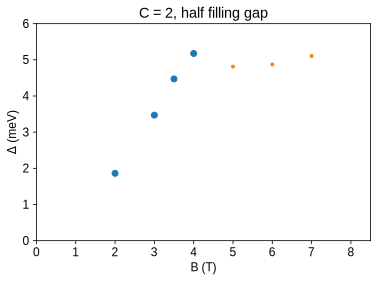

In [106]:

plt.figure()
plt.plot([2, 3, 3.5, 4], np.array([m_C2_2, m_C2_3, m_C2_3p5, m_C2_4])*-1.381e-23/1.602e-19*2*1000, 'o')
plt.plot([5, 6, 7], np.array([m_C2_5, m_C2_6, m_C2_7])*-1.381e-23/1.602e-19*2*1000, '.')
plt.axis([0, 8.5, 0, 6])
plt.axis([0, 8.5, 0, 6])
plt.xlabel('B (T)')
plt.ylabel('$\Delta$ (meV)')
plt.title( 'C = 2, half filling gap')

## Data compiling, statistics, and plots

In [204]:
Tvals # needs some recompiling

array([ 0.025,  0.3  ,  0.5  ,  0.75 ,  1.   ,  1.25 ,  1.5  ,  1.75 ,
        2.   ,  3.   ,  5.   ,  7.   , 10.   , 15.   , 20.   ,  2.5  ,
        3.5  ,  4.   ,  4.5  ,  5.5  ,  6.   ,  8.   ,  9.   ])

In [205]:
Tmap = np.argsort(Tvals)
Tvalss = np.sort(Tvals)
RxxCp2s = RxxC2[Tmap, :]

In [206]:
print(np.sort(np.concatenate((Tvals[13:15], Tvals[23:23]))))
print(Tvalss[21:23])

[15. 20.]
[15. 20.]


In [207]:
BCp2 = Bm1

#low fields
n1 = [17, 17, 18, 19]
n2 = [23, 24, 24, 24]
xvals = []
yvals = []
for i in range(4):
    xvals.append(1/Tvalslow[n1[i]:n2[i]])
    yvals.append(np.log(RxxC2low[n1[i]:n2[i], i]))

#high fields
n1 = [18, 19, 21, 21]
n2 = [23, 23, 23, 23]
for i in range(4):
    xvals.append(1/Tvalss[n1[i]:n2[i]])
    yvals.append(np.log(RxxCp2s[n1[i]:n2[i], i]))

In [203]:
Tfit = LinearModel()
nuCp2slopes = np.zeros(len(BCp2))
nuCp2bs = np.zeros(len(BCp2))
nuCp2stderrs = np.zeros(len(BCp2))
nuCp2conferrs_upper = np.zeros(len(BCp2))
nuCp2conferrs_lower = np.zeros(len(BCp2))
modeldevfields = []
for i in range(len(BCp2)):
    result = Tfit.fit(yvals[i], slope=-1, intercept=10, x=xvals[i])
    nuCp2slopes[i] = result.params['slope'].value
    nuCp2stderrs[i] = result.params['slope'].stderr
    nuCp2bs[i] = result.params['intercept'].value
    modeldevfields.append(result.eval_uncertainty(xvals[i]))
    cislope = result.conf_interval()['slope']
    nuCp2conferrs_upper[i] = cislope[1][1] - result.params['slope'].value
    nuCp2conferrs_lower[i] = -1*(cislope[5][1] - result.params['slope'].value)
    
nuCp2gaps = nuCp2slopes*-1.381e-23/1.602e-19*2*1000
nuCp2gaperrs = nuCp2stderrs*-1.381e-23/1.602e-19*2*1000
nuCp2gapconferrs_upper = nuCp2conferrs_upper*-1.381e-23/1.602e-19*2*1000
nuCp2gapconferrs_lower = nuCp2conferrs_lower*-1.381e-23/1.602e-19*2*1000

result = Tfit.fit(nuCp2gaps[:4], slope=0.05, intercept=0, x=BCp3[:4])
nuCp2gapfitslope = result.params['slope'].value
nuCp2gapfitb = result.params['intercept'].value
nuCp2gapfitstderr = result.params['slope'].stderr
modelB = np.linspace(0, 8.5, 20)
modeldev = result.eval_uncertainty(x=modelB, sigma=2)
ci = result.conf_interval()['slope']
nuCp2slopeconferr_upper = ci[5][1] - nuCp2gapfitslope
nuCp2slopeconferr_lower = nuCp2gapfitslope - ci[1][1]
print(result.ci_report())

              99.73%    95.45%    68.27%    _BEST_    68.27%    95.45%    99.73%
 slope    :  -1.12428  -0.26497  -0.07735   1.68117  +0.07735  +0.26497  +1.12428
 intercept:  -3.61042  -0.85089  -0.24836  -1.50883  +0.24837  +0.85089  +3.61042


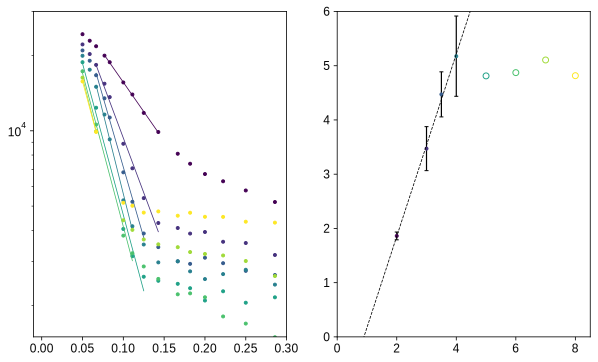

In [208]:
cs = plt.get_cmap('viridis')([i/(8-1) for i in range(8)])
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
for i in range(8):
    if i < 4:
        T = Tvalslow
        R = RxxC2low[:, i]
    else:
        T = Tvalss
        R = RxxCp2s[:, i-4]
    ax[0].semilogy(1/T, R, '.', color=cs[i])
    x1 = np.linspace(xvals[i][0], xvals[i][-1], 10)
    ax[0].semilogy(x1, np.exp(nuCp2slopes[i]*x1 + nuCp2bs[i]), lw=0.8, color=cs[i])
    if i < 4:
        ax[1].plot(BCp2[i], nuCp2gaps[i], '.', color=cs[i])
        ax[1].errorbar(BCp2[i], nuCp2gaps[i], yerr=np.array([[nuCp2gapconferrs_lower[i], nuCp2gapconferrs_upper[i]]]).T, color='k', lw=0, elinewidth=1.2, capsize=2)
    else:
        ax[1].plot(BCp2[i], nuCp2gaps[i], 'o', color=cs[i], fillstyle='none')
        
    
ax[0].axis([-0.01, 0.3, 1.5e3, 3e4])
ax[1].axis([0, 8.5, 0, 6])
modelbestfit = modelB*nuCp2gapfitslope + nuCp2gapfitb
ax[1].plot(modelB, modelbestfit, 'k--', lw=0.8)
# ax[1].plot(Bm1, result.best_fit, 'k--', lw=0.8)
# ax[1].fill_between(modelB, modelbestfit-modeldev, modelbestfit+modeldev, color='gray', alpha=0.2)

# summary

Text(0.5, 1.0, '$\\nu$ = 2  gap')

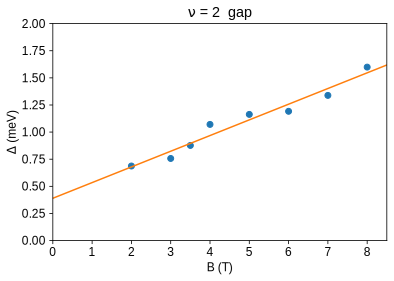

In [223]:
plt.figure()
plt.plot([2, 3, 3.5, 4, 5, 6, 7, 8], np.array([mp22, mp23, mp23p5, mp24, mp25, mp26, mp27, mp28])*-1.381e-23/1.602e-19*2*1000, 'o')
plt.axis([0, 8.5, 0, 2])
mp2, bp2 = np.polyfit([2, 3, 3.5, 4, 5, 6, 7, 8], np.array([mp22, mp23, mp23p5, mp24, mp25, mp26, mp27, mp28])*-1.381e-23/1.602e-19*2*1000, 1)
x = np.linspace(0, 8.5, 100)
plt.plot(x, mp2*x + bp2)
plt.xlabel('B (T)')
plt.ylabel('$\Delta$ (meV)')
plt.title( r'$\nu$ = 2  gap')

ValueError: setting an array element with a sequence.

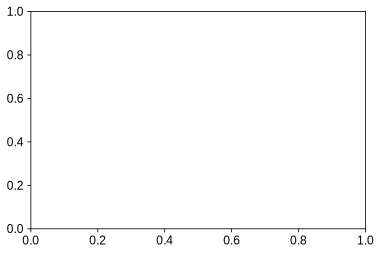

In [228]:
plt.figure()
fitlw = 0.8

plt.plot(np.array([2, 3, 3.5, 4, 5, 6, 7, 8]), np.array([m2, m3, m3p5, m4, m5, m6, m7, m8]), '-o', label ='nu = -1')
plt.axis([0, 8.5, 0, 0.5])
mm1, bm1 = np.polyfit([2, 3, 3.5, 4, 5, 6, 7, 8], np.array([m2, m3, m3p5, m4, m5, m6, m7, m8])*-1.381e-23/1.602e-19*2*1000, 1)
x = np.linspace(0, 8.5, 100)
plt.plot(x, mm1*x + bm1, color='blue', linestyle='dashed', lw=fitlw)


plt.plot([2, 3, 3.5, 4, 5, 6, 7, 8], np.array([m22, m23, m23p5, m24, m25, m26, m27, m28])*-1.381e-23/1.602e-19*2*1000, '-o',  label ='nu = -2')
plt.axis([0, 8.5, 0, 1.5])
mm2, bm2 = np.polyfit([2, 3, 3.5, 4, 5, 6, 7, 8], np.array([m22, m23, m23p5, m24, m25, m26, m27, m28])*-1.381e-23/1.602e-19*2*1000, 1)
x = np.linspace(0, 8.5, 100)
plt.plot(x, mm2*x + bm2, color='orange', linestyle='dashed', lw=fitlw)


plt.plot([2, 3, 3.5, 4, 5, 6, 7, 8], np.array([mp22, mp23, mp23p5, mp24, mp25, mp26, mp27, mp28])*-1.381e-23/1.602e-19*2*1000, '-o',  label ='nu = 2')
plt.axis([0, 8.5, 0, 1.5])
mp2, bp2 = np.polyfit([2, 3, 3.5, 4, 5, 6, 7, 8], np.array([mp22, mp23, mp23p5, mp24, mp25, mp26, mp27, mp28])*-1.381e-23/1.602e-19*2*1000, 1)
x = np.linspace(0, 8.5, 100)
plt.plot(x, mp2*x + bp2, color='green', linestyle='dashed', lw=fitlw)


plt.plot([5, 6, 7, 8], np.array([m_Cm3_5, m_Cm3_6, m_Cm3_7, m_Cm3_8])*-1.381e-23/1.602e-19*2*1000, '-o',  label ='C = -3, \u03BD = -1')
mmC3, bmC3 = np.polyfit([5, 6, 7, 8], np.array([m_Cm3_5, m_Cm3_6, m_Cm3_7, m_Cm3_8])*-1.381e-23/1.602e-19*2*1000, 1)
x = np.linspace(0, 8.5, 100)
plt.plot(x, mmC3*x + bmC3, color='red', linestyle='dashed', lw=fitlw)


plt.plot([2, 3, 3.5, 4], np.array([m_C3_2, m_C3_3, m_C3_3p5, m_C3_4])*-1.381e-23/1.602e-19*2*1000, '-o',  label ='C = 3, \u03BD = 1')
plt.plot([5, 6, 7, 8], np.array([m_C3_5, m_C3_6, m_C3_7, m_C3_8])*-1.381e-23/1.602e-19*2*1000, '.', color='purple')#  label ='C = 3 saturated', color='purple')
mC3, bC3 = np.polyfit([2, 3, 3.5, 4], np.array([m_C3_2, m_C3_3, m_C3_3p5, m_C3_4])*-1.381e-23/1.602e-19*2*1000, 1)
x = np.linspace(0, 8.5, 100)
plt.plot(x, mC3*x + bC3, color='purple', linestyle='dashed', lw=fitlw)


plt.plot([2, 3, 3.5, 4], np.array([m_C2_2, m_C2_3, m_C2_3p5, m_C2_4])*-1.381e-23/1.602e-19*2*1000, '-o', label ='C = 2, \u03BD = 2')
plt.plot([5, 6, 7], np.array([m_C2_5, m_C2_6, m_C2_7])*-1.381e-23/1.602e-19*2*1000, '.',  color='brown') #label ='C = 2 saturated', color='brown')
mC2, bC2 = np.polyfit([2, 3, 3.5, 4], np.array([m_C2_2, m_C2_3, m_C2_3p5, m_C2_4])*-1.381e-23/1.602e-19*2*1000, 1)
x = np.linspace(0, 8.5, 100)
plt.plot(x, mC2*x + bC2, color='brown', linestyle='dashed', lw=fitlw)



plt.axis([0, 8.5, 0, 6])
plt.xlabel('B (T)')
plt.ylabel('$\Delta$ (meV)')
plt.legend()

g factors

In [226]:
mub = 1.602e-19*(6.626e-34/(2*np.pi))/(2*9.11e-31)/1.602e-19*1000  # in meV/T

NameError: name 'mmC3' is not defined

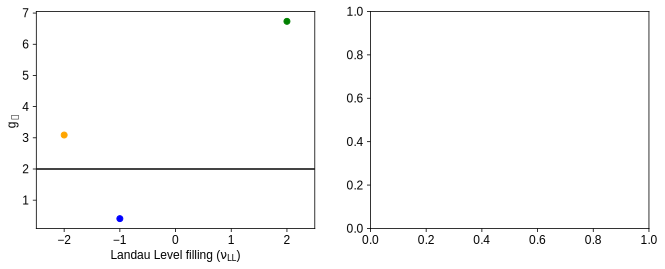

In [227]:
fig, ax = plt.subplots(1, 2, figsize=(11, 4))
ax[0].plot([-2], [mm2/mub], 'o', color='orange')
ax[0].plot([-1], [bm1/mub], 'o', color='blue')
ax[0].plot([2], [bp2/mub], 'o', color='green')
ax[0].hlines(2, -2.5, 2.5)
ax[0].set_xlim(-2.5, 2.5)
ax[0].set_xlabel('Landau Level filling ($\\nu_{LL}$)')
ax[0].set_ylabel('g$_{\perp}$')

ax[1].plot([-1], [mmC3/mub], 'o', color='red')
ax[1].plot([1], [mC3/mub], 'o', color='purple')
ax[1].plot([2], [mC2/mub], 'o', color='brown')
ax[1].hlines(2, -1.5, 2.5)
ax[1].set_xlim(-1.5, 2.5)
ax[1].set_xlabel('Chern insulator origin (n/n$_0$)')
ax[1].set_ylabel('g$_{\perp}$')

In [88]:
1/0.082

12.195121951219512

In [74]:
mub = 1.602e-19*(6.626e-34/(2*np.pi))/(2*9.11e-31)/1.602e-19*1000  # in meV/T

# Summary 2

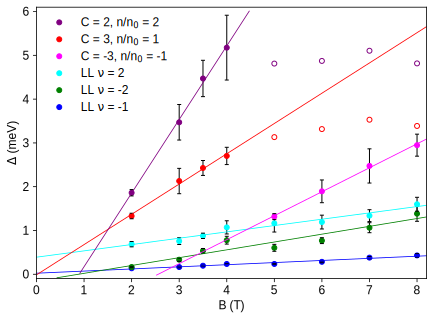

In [123]:
markersize = 5
fitlw = 0.8
errlw = 1
xmin, xmax = 0, 8.2
ymin, ymax = -0.1, 6.1

plt.figure(figsize=(7, 5))
m1 = plt.plot(Bm1, num1gaps, 'o', color='blue', ms=markersize)
plt.errorbar(Bm1, num1gaps, yerr=np.array([num1gapconferrs_lower, num1gapconferrs_upper]), color='k', lw=0, elinewidth=errlw, capsize=2)
x1 = np.linspace(xmin, xmax, 20)
plt.plot(x1, np.ma.masked_outside(num1gapfitslope*x1 + num1gapfitb, ymin, ymax), lw=fitlw, color='blue')

m2 = plt.plot(Bm2, num2gaps, 'o', color='green', ms=markersize)
plt.errorbar(Bm2, num2gaps, yerr=np.array([num2gapconferrs_lower, num2gapconferrs_upper]), color='k', lw=0, elinewidth=errlw, capsize=2)
x2 = np.linspace(xmin, xmax, 20)
plt.plot(x2, np.ma.masked_outside(num2gapfitslope*x2 + num2gapfitb, ymin, ymax), lw=fitlw, color='green')

p2 = plt.plot(Bp2, nup2gaps, 'o', color='cyan', ms=markersize)
plt.errorbar(Bp2, nup2gaps, yerr=np.array([nup2gapconferrs_lower, nup2gapconferrs_upper]), color='k', lw=0, elinewidth=errlw, capsize=2)
x3 = np.linspace(xmin, xmax, 20)
plt.plot(x3, np.ma.masked_outside(nup2gapfitslope*x3 + nup2gapfitb, ymin, ymax), lw=fitlw, color='cyan')

Cm3 = plt.plot(BCm3, nuCm3gaps, 'o', color='magenta', ms=markersize)
plt.errorbar(BCm3, nuCm3gaps, yerr=np.array([nuCm3gapconferrs_lower, nuCm3gapconferrs_upper]), color='k', lw=0, elinewidth=errlw, capsize=2)
x4 = np.linspace(xmin, xmax, 40)
plt.plot(x4, np.ma.masked_outside(nuCm3gapfitslope*x4 + nuCm3gapfitb, ymin, ymax), lw=fitlw, color='magenta')

Cp3 = plt.plot(BCp3[:4], nuCp3gaps[:4], 'o', color='red', ms=markersize)
plt.errorbar(BCp3[:4], nuCp3gaps[:4], yerr=np.array([nuCp3gapconferrs_lower[:4], nuCp3gapconferrs_upper[:4]]), color='k', lw=0, elinewidth=errlw, capsize=2)
plt.plot(BCp3[4:], nuCp3gaps[4:], 'o', color='red', ms=markersize, fillstyle='none')
x5 = np.linspace(xmin, xmax, 20)
plt.plot(x5, np.ma.masked_outside(nuCp3gapfitslope*x5 + nuCp3gapfitb, ymin, ymax), lw=fitlw, color='red')

Cp2 = plt.plot(BCp2[:4], nuCp2gaps[:4], 'o', color='purple', ms=markersize)
plt.errorbar(BCp2[:4], nuCp2gaps[:4], yerr=np.array([nuCp2gapconferrs_lower[:4], nuCp2gapconferrs_upper[:4]]), color='k', lw=0, elinewidth=errlw, capsize=2)
plt.plot(BCp2[4:], nuCp2gaps[4:], 'o', color='purple', ms=markersize, fillstyle='none')
x6 = np.linspace(xmin, xmax, 100)
plt.plot(x6, np.ma.masked_outside(nuCp2gapfitslope*x6 + nuCp2gapfitb, ymin, ymax), lw=fitlw, color='purple')

plt.axis([0, 8.2, -0.1, 6.1])
plt.legend([Cp2[0], Cp3[0], Cm3[0], p2[0], m2[0], m1[0]], ['C = 2, n/n$_0$ = 2', 'C = 3, n/n$_0$ = 1', 'C = -3, n/n$_0$ = -1', 'LL $\\nu$ = 2', 'LL $\\nu$ = -2', 'LL $\\nu$ = -1'], loc='upper left', frameon=False)

plt.xlabel('B (T)')
plt.ylabel('$\Delta$ (meV)')

# plt.savefig(figfile + 'W3_Gapsize_field_LinearFits.svg', dpi=300, bbox_inches='tight')

Text(0.5, 0, 'CNP LL filling $\\nu$')

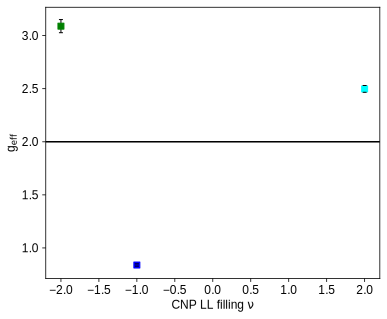

In [221]:
xmin, xmax = -2.2, 2.2

mub = 1.602e-19*(6.626e-34/(2*np.pi))/(2*9.11e-31)/1.602e-19*1000  # in meV/T
colors = ['blue', 'green', 'cyan', 'magenta', 'red', 'purple']
nuLL = [-1, -2, 2]
C = [-3, 3, 2]
gapslopefits = np.array([num1gapfitslope, num2gapfitslope, nup2gapfitslope, nuCm3gapfitslope, nuCp3gapfitslope, nuCp2gapfitslope])
gapslopeci_upper = np.array([num1slopeconferr_upper, num2slopeconferr_upper, nup2slopeconferr_upper, nuCm3slopeconferr_upper, nuCp3slopeconferr_upper, nuCp2slopeconferr_upper])
gapslopeci_lower = np.array([num1slopeconferr_lower, num2slopeconferr_lower, nup2slopeconferr_lower, nuCm3slopeconferr_lower, nuCp3slopeconferr_lower, nuCp2slopeconferr_lower])

fitgfactor = gapslopefits/mub
gfactorci_upper = gapslopeci_upper/mub
gfactorci_lower = gapslopeci_lower/mub

# plot the gfactors and compare to 2
plt.figure(figsize=(6, 5))
for i in range(3):
    plt.plot(nuLL[i], fitgfactor[i], 's', color=colors[i])
    plt.errorbar(nuLL[i], fitgfactor[i], yerr=np.array([[gapslopeci_lower[i], gapslopeci_upper[i]]]).T, color='k', lw=0, elinewidth=errlw, capsize=2)
    
plt.hlines(2, xmin, xmax, 'k')
plt.xlim(xmin, xmax)
plt.ylabel('g$_{eff}$')
plt.xlabel('CNP LL filling $\\nu$')

Text(0.5, 0, 'Chern number C')

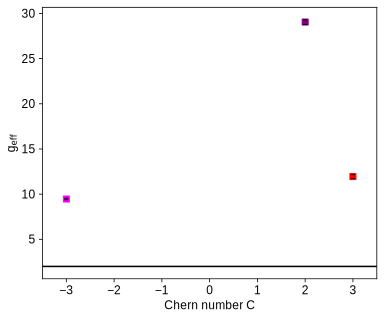

In [222]:
xmin, xmax = -3.5, 3.5
# plot the gfactors and compare to 2
plt.figure(figsize=(6, 5))
for i in range(3):
    plt.plot(C[i], fitgfactor[i+3], 's', color=colors[i+3])
    plt.errorbar(C[i], fitgfactor[i+3], yerr=np.array([[gapslopeci_lower[i+3], gapslopeci_upper[i+3]]]).T, color='k', lw=0, elinewidth=errlw, capsize=2)
    
plt.hlines(2, xmin, xmax, 'k')
plt.xlim(xmin, xmax)
plt.ylabel('g$_{eff}$')
plt.xlabel('Chern number C')